In [408]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['data', 'Heart Disease Prediction Using Machine Learning.ipynb', 'heartDiseaseAndAges.png', 'HeartDiseasePrediction.py', 'images', 'model', 'notebook', 'README.md', 'requirements.txt']


In [409]:
data = pd.read_csv("./data/heart_disease_data.csv")

In [410]:
type(data)

pandas.core.frame.DataFrame

In [411]:
data.shape

(515, 14)

In [412]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [413]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000
mean,55.287379,0.710680,0.743689,131.957282,235.180583,0.118447,0.524272,147.095146,0.401942,1.280000,1.355340,0.699029,2.442718,0.320388
std,8.288977,0.453888,0.982500,14.993712,45.977710,0.323450,0.522726,19.306374,0.490767,1.076314,0.564813,0.917141,0.596782,0.467080
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,49.000000,0.000000,0.000000,122.000000,204.000000,0.000000,0.000000,135.000000,0.000000,0.300000,1.000000,0.000000,2.000000,0.000000
50%,57.000000,1.000000,0.000000,130.000000,225.000000,0.000000,1.000000,146.000000,0.000000,1.200000,1.000000,0.000000,2.000000,0.000000
75%,61.000000,1.000000,2.000000,140.000000,257.000000,0.000000,1.000000,160.000000,1.000000,2.000000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [414]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       515 non-null    int64  
 1   sex       515 non-null    int64  
 2   cp        515 non-null    int64  
 3   trestbps  515 non-null    int64  
 4   chol      515 non-null    int64  
 5   fbs       515 non-null    int64  
 6   restecg   515 non-null    int64  
 7   thalach   515 non-null    int64  
 8   exang     515 non-null    int64  
 9   oldpeak   515 non-null    float64
 10  slope     515 non-null    int64  
 11  ca        515 non-null    int64  
 12  thal      515 non-null    int64  
 13  target    515 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 56.5 KB


In [415]:
data.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
55,52,1,1,134,201,0,1,158,0,0.8,2,1,2,1
15,50,0,2,120,219,0,1,158,0,1.6,1,0,2,1
206,59,1,0,110,239,0,0,142,1,1.2,1,1,3,0
149,42,1,2,130,180,0,1,150,0,0.0,2,0,2,1
185,44,1,0,112,290,0,0,153,0,0.0,2,1,2,0


In [416]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [417]:
data.isnull().sum().sum()

0

### So, we have no missing values

In [418]:
print(data.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
oldpeak     0.445046
cp          0.442142
thalach     0.404807
thal        0.370258
exang       0.367674
slope       0.290332
ca          0.251332
age         0.231365
sex         0.222652
trestbps    0.121664
chol        0.105379
restecg     0.091598
fbs         0.044509
Name: target, dtype: float64


### This shows that most columns are moderately correlated with target, but 'fbs' is very weakly correlated.

# Exploratory Data Analysis (EDA)

In [419]:
y = data["target"]

0    350
1    165
Name: target, dtype: int64


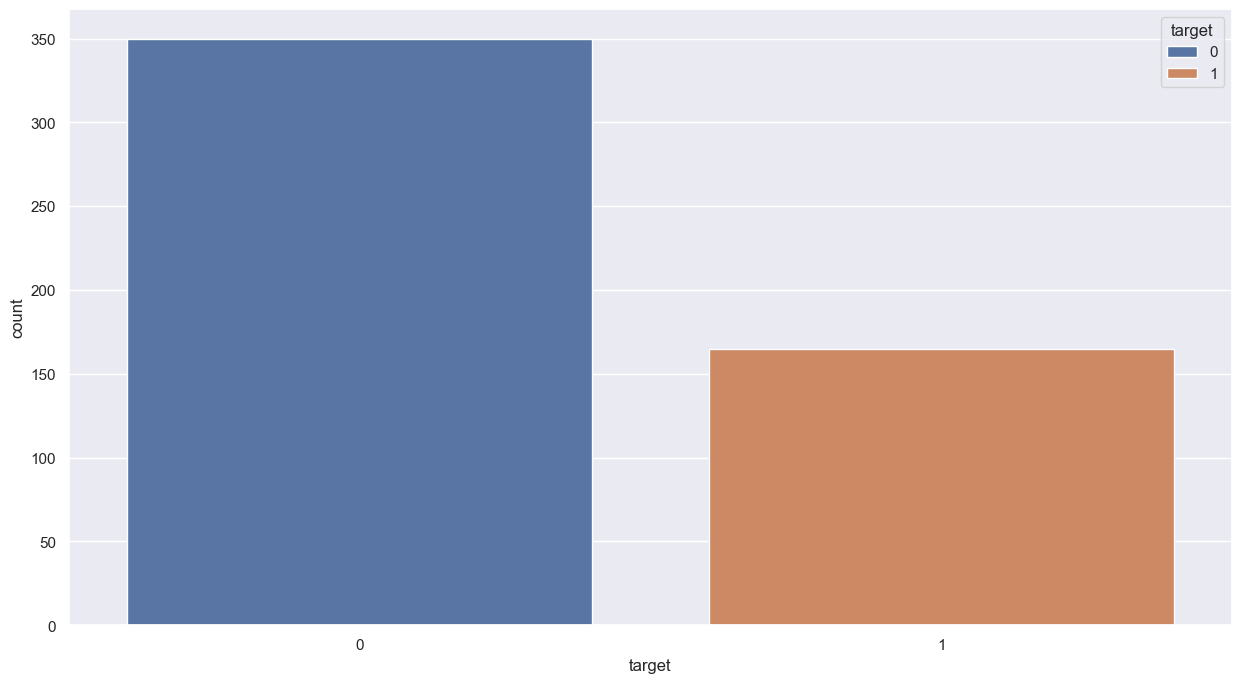

In [420]:
ax = sns.countplot(data, x = "target", hue='target')
target_temp = data.target.value_counts()
print(target_temp)

From the total dataset of 303 patients, 165 (54%) have a heart disease (target=1)

# Percentage of patient with or without heart problems in the given dataset

In [421]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

Percentage of patience without heart problems: 115.51
Percentage of patience with heart problems: 54.46


In [422]:
data["sex"].unique()

array([1, 0], dtype=int64)

<Axes: xlabel='sex', ylabel='target'>

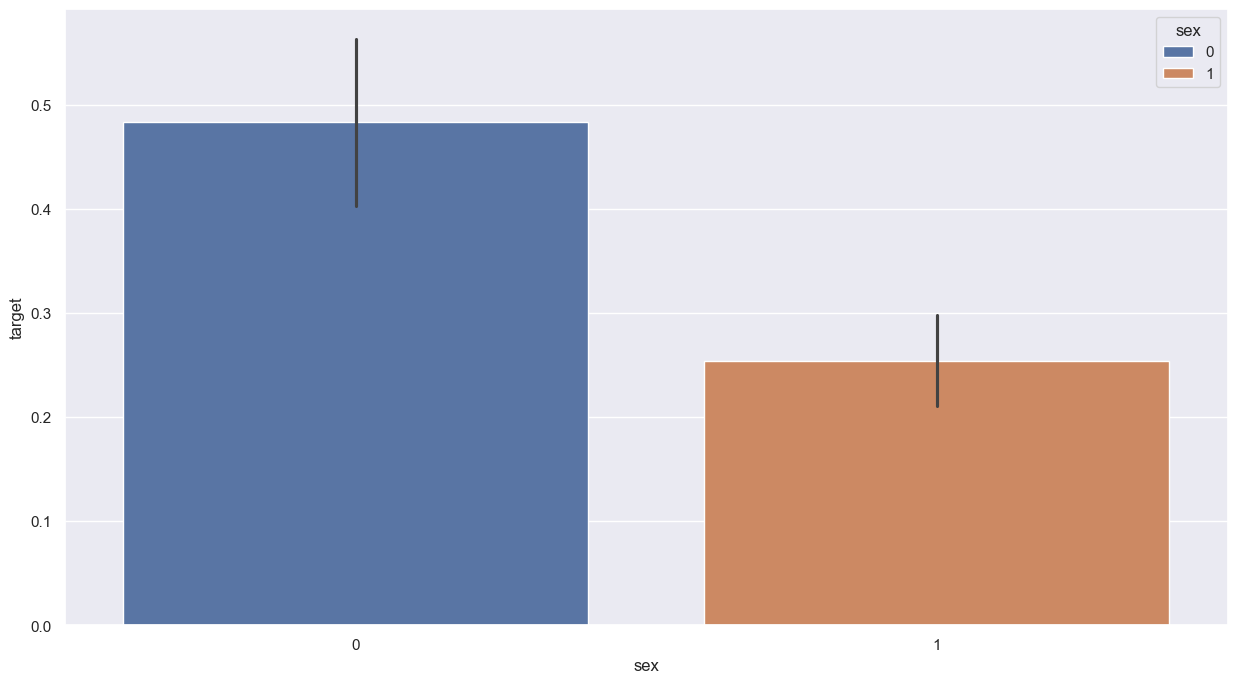

In [423]:

sns.barplot(x='sex', y='target', data=data, hue='sex')

<Axes: xlabel='cp', ylabel='target'>

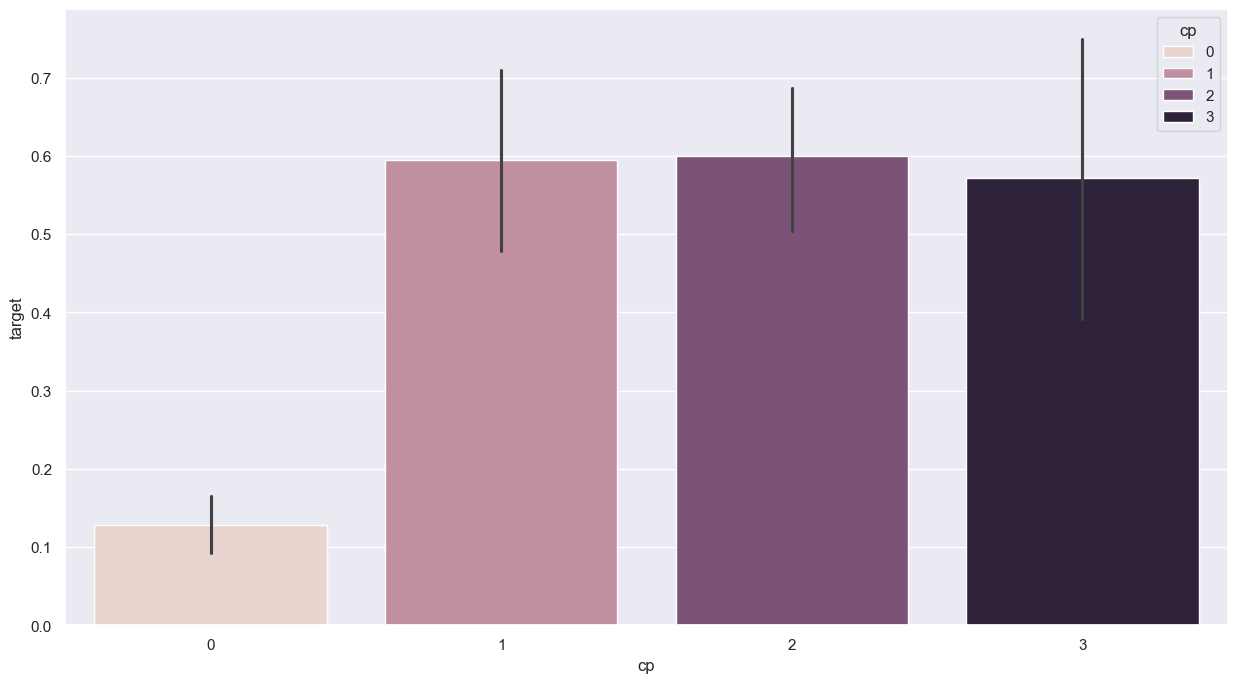

In [424]:
sns.barplot(data, x="cp",y='target', hue='cp')

<Axes: xlabel='fbs', ylabel='target'>

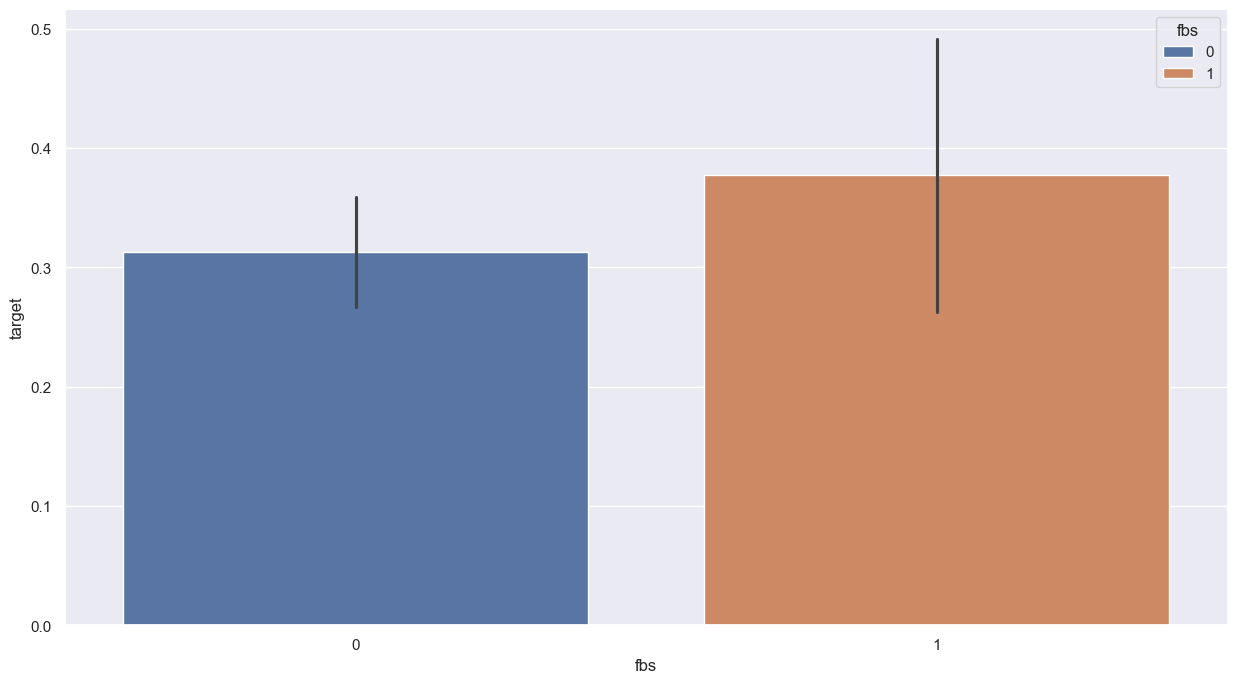

In [425]:
sns.barplot(data, x="fbs",y='target', hue='fbs')

<Axes: xlabel='restecg', ylabel='target'>

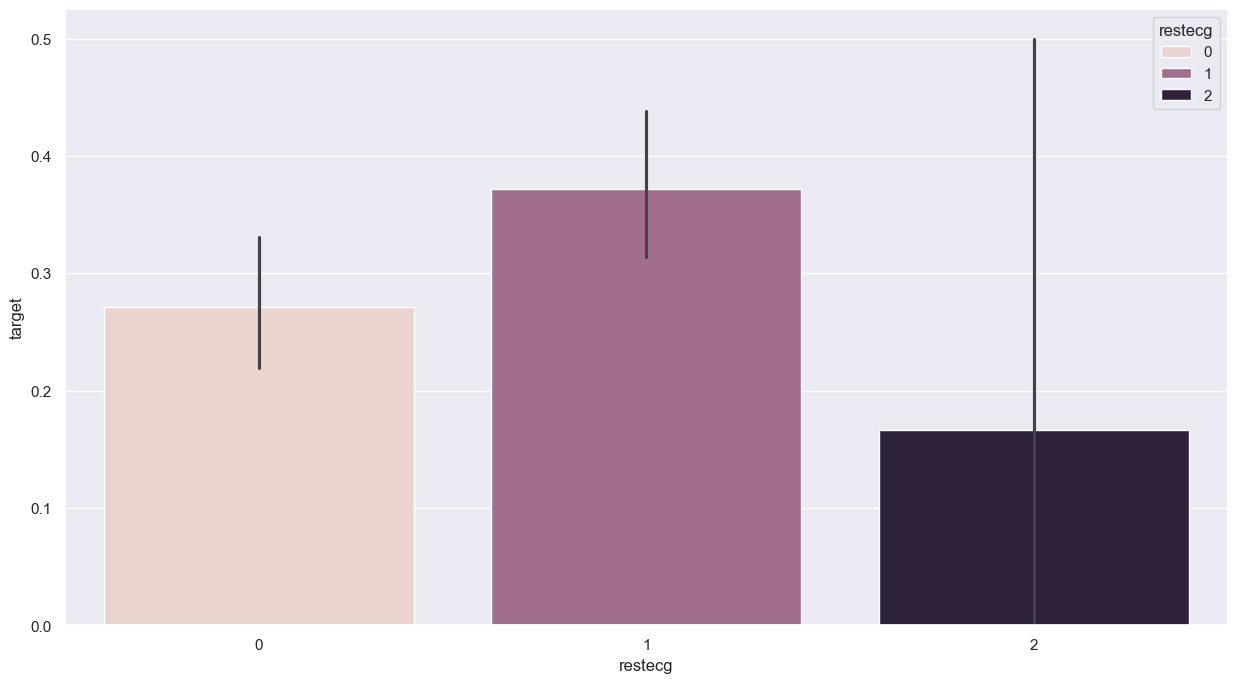

In [426]:
sns.barplot(data, x="restecg",y='target', hue='restecg')

<Axes: xlabel='ca', ylabel='target'>

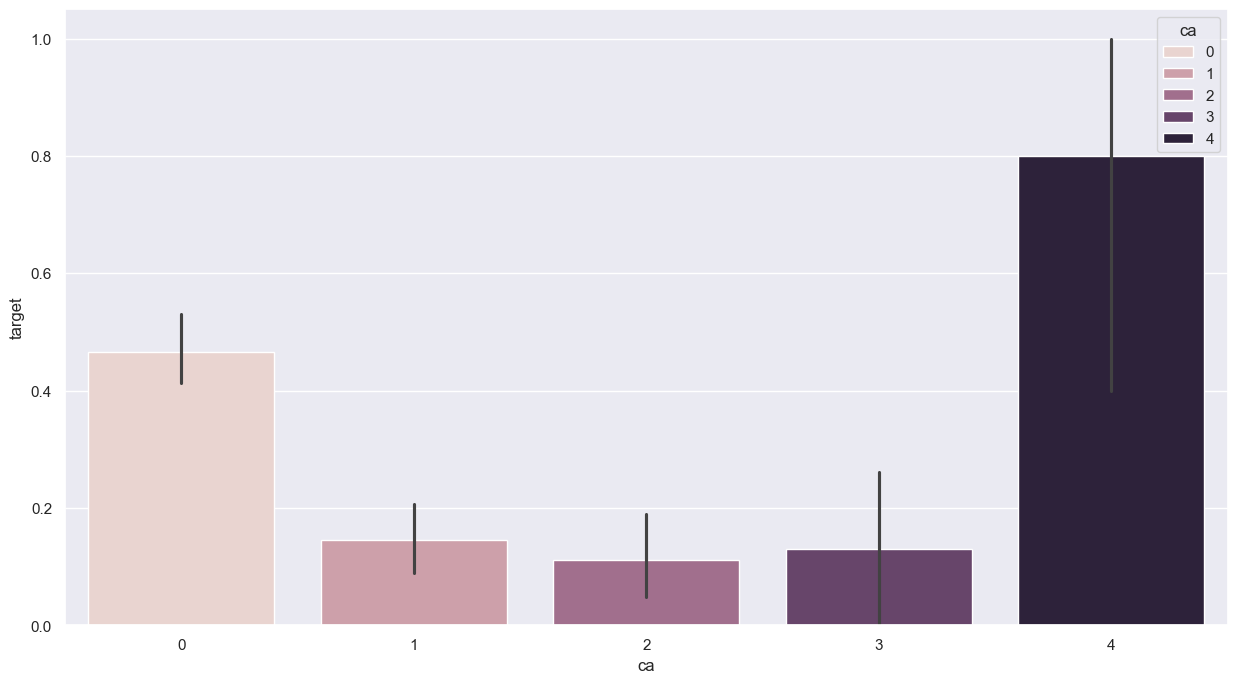

In [427]:
sns.barplot(data, x="ca",y='target', hue='ca')

<Axes: xlabel='trestbps'>

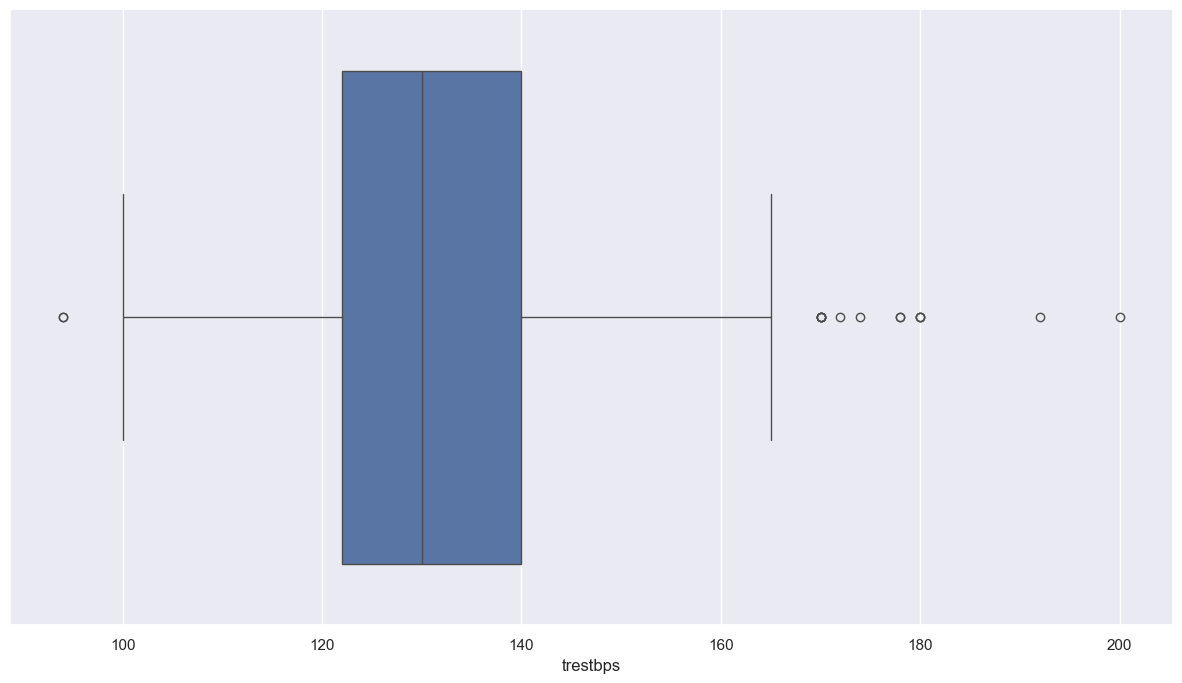

In [428]:
sns.boxplot(x=data["trestbps"])

<Axes: xlabel='chol'>

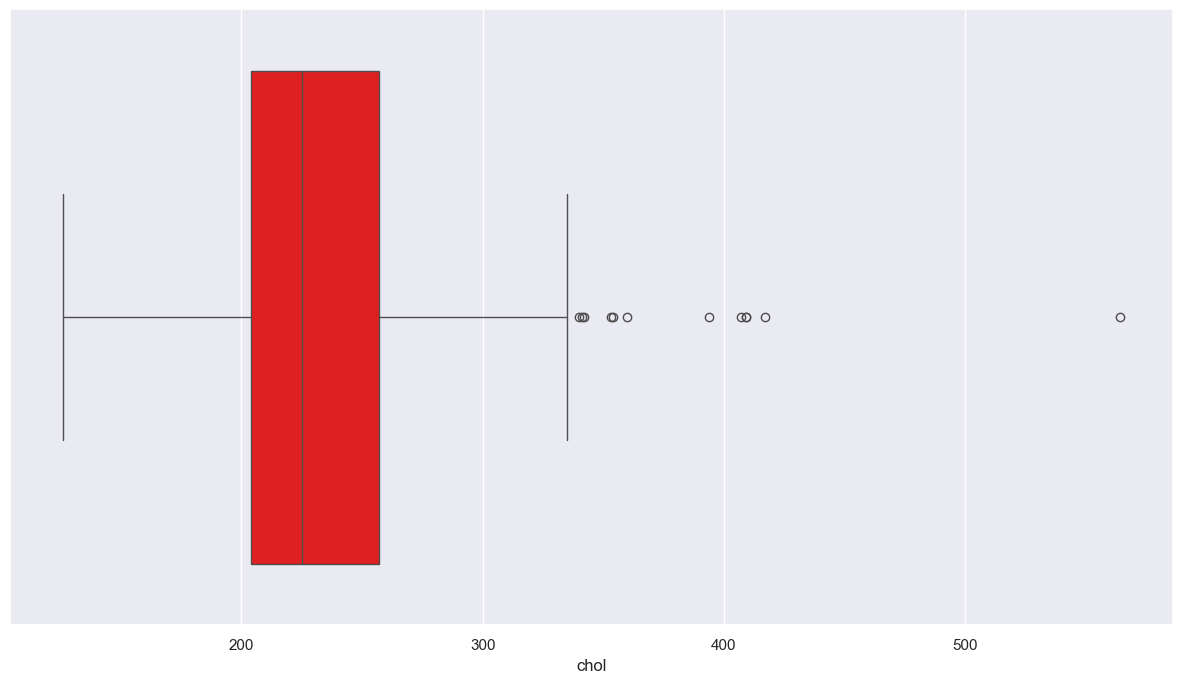

In [429]:
sns.boxplot(x=data["chol"], color='red')

Text(0, 0.5, '')

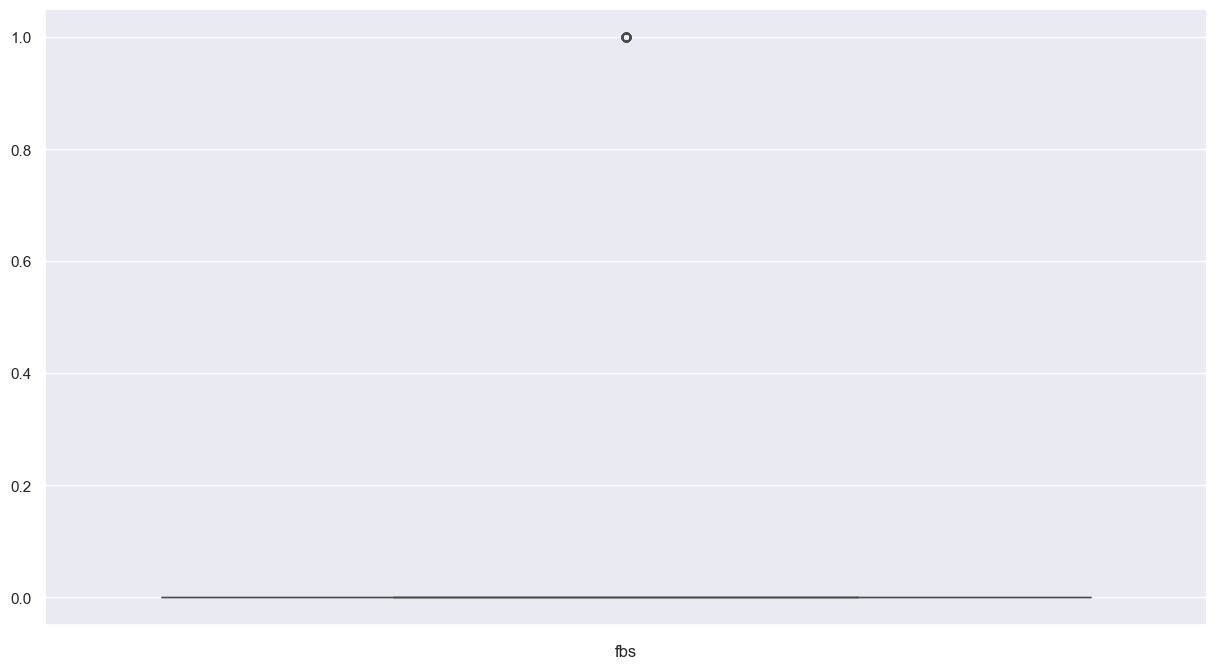

In [430]:
sns.boxplot(y=data["fbs"])
plt.xlabel("fbs")
plt.ylabel(None)

Text(0, 0.5, '')

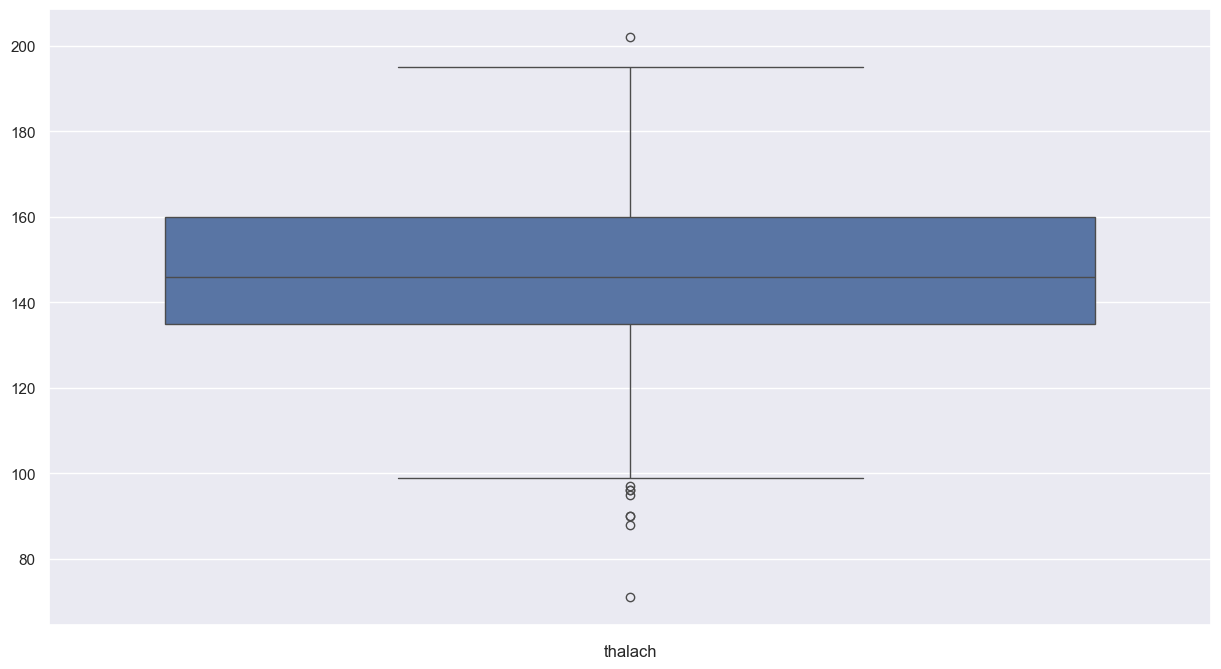

In [431]:
sns.boxplot(y=data["thalach"])
plt.xlabel("thalach")
plt.ylabel(None)

<Axes: xlabel='oldpeak'>

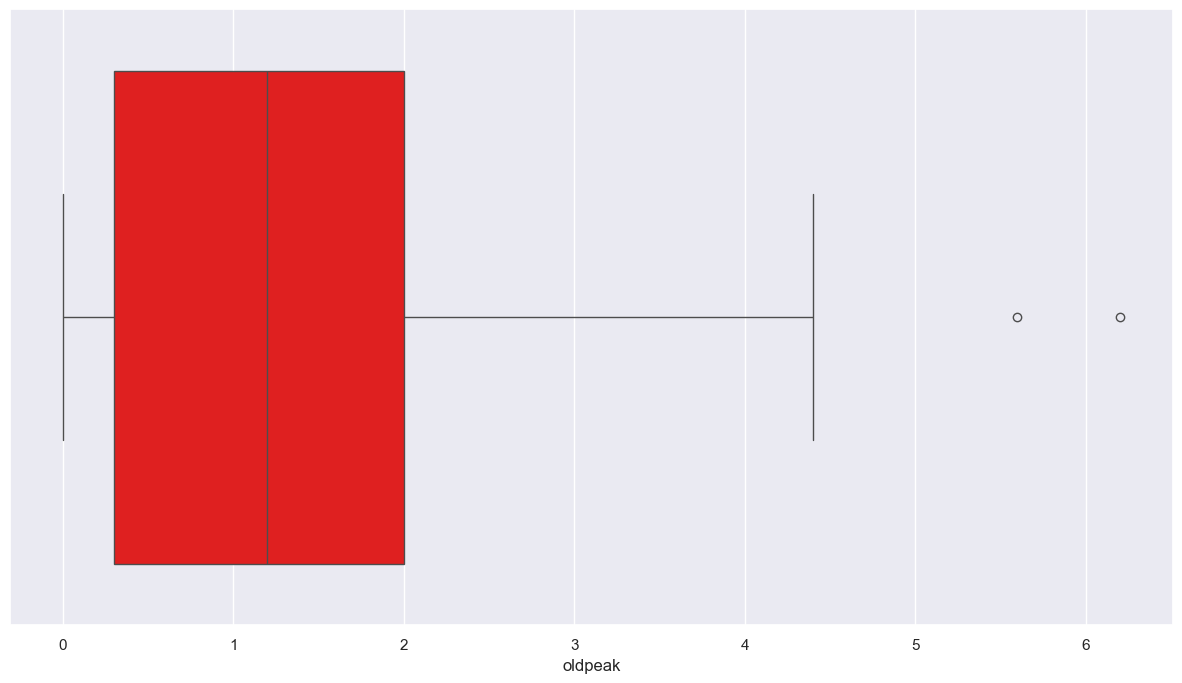

In [432]:
sns.boxplot(x=data["oldpeak"], color='red')

Text(0, 0.5, '')

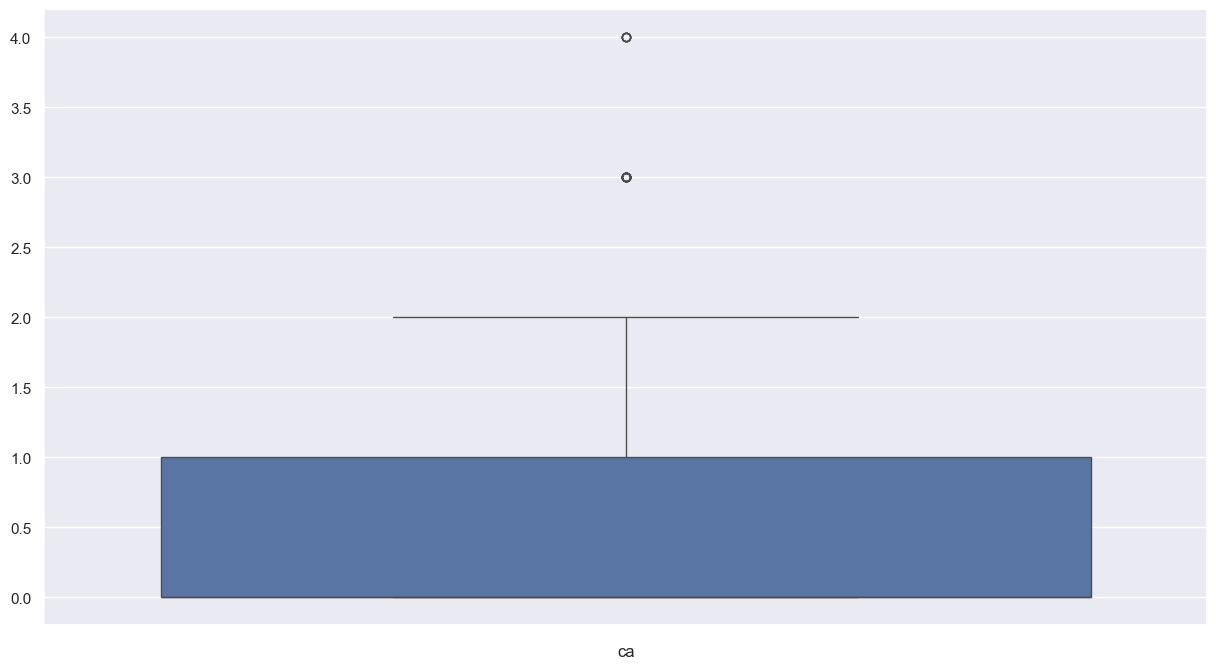

In [433]:
sns.boxplot(y=data["ca"])
plt.xlabel("ca")
plt.ylabel(None)

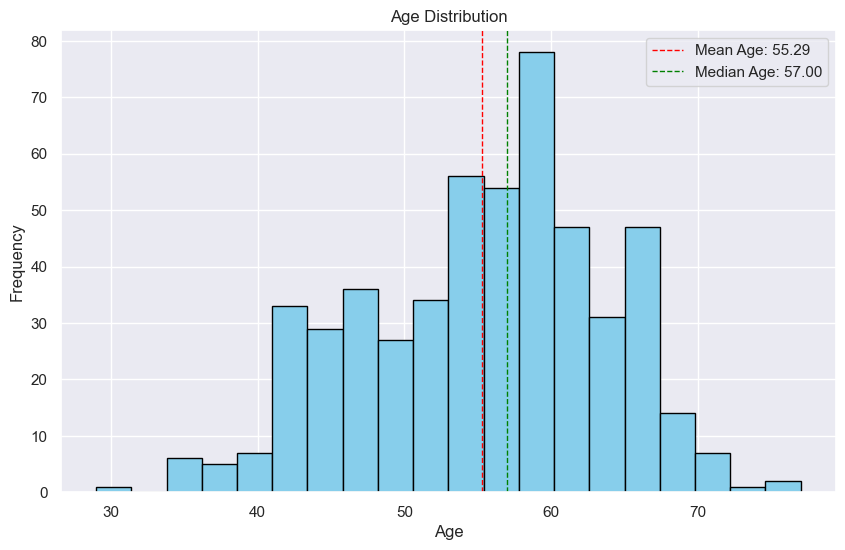

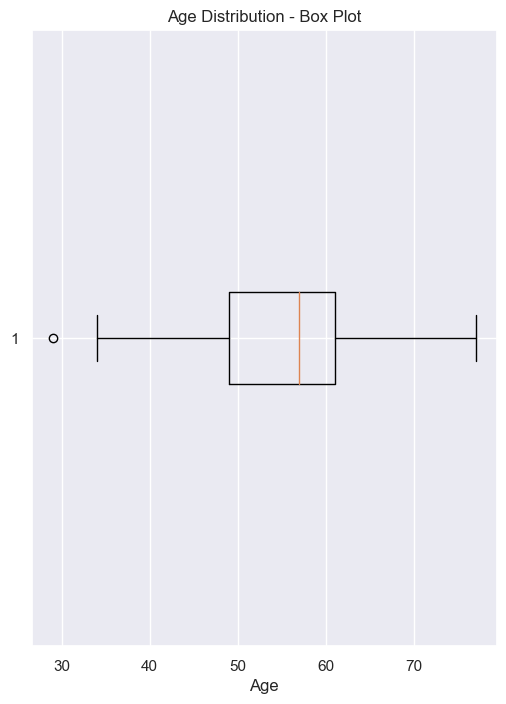

Mean Age: 55.29
Median Age: 57.00
Standard Deviation of Age: 8.29


In [434]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing the dataset
# Replace 'age_column' with the name of the column containing ages in your dataset
age_column = 'age'

# Calculate summary statistics
mean_age = data[age_column].mean()
median_age = data[age_column].median()
std_age = data[age_column].std()

# Visualize age distribution using a histogram
plt.figure(figsize=(10, 6))
plt.hist(data[age_column], bins=20, color='skyblue', edgecolor='black')
plt.axvline(mean_age, color='red', linestyle='dashed', linewidth=1, label=f'Mean Age: {mean_age:.2f}')
plt.axvline(median_age, color='green', linestyle='dashed', linewidth=1, label=f'Median Age: {median_age:.2f}')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.legend()
plt.grid(True)
plt.show()

# Visualize age distribution using a box plot
plt.figure(figsize=(6, 8))
plt.boxplot(data[age_column], vert=False)
plt.xlabel('Age')
plt.title('Age Distribution - Box Plot')
plt.grid(True)
plt.show()

# Print summary statistics
print(f"Mean Age: {mean_age:.2f}")
print(f"Median Age: {median_age:.2f}")
print(f"Standard Deviation of Age: {std_age:.2f}")


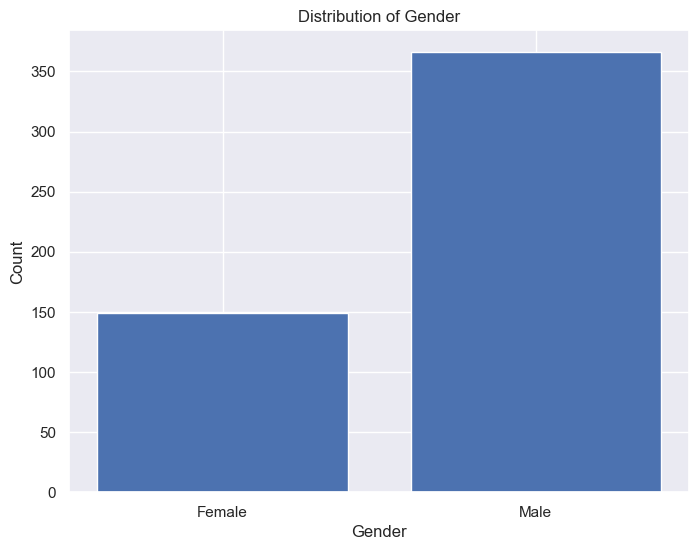

In [435]:
# Gender Analysis
gender_counts = data['sex'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(gender_counts.index, gender_counts.values)
plt.xticks(gender_counts.index, ['Male', 'Female'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')
plt.show()


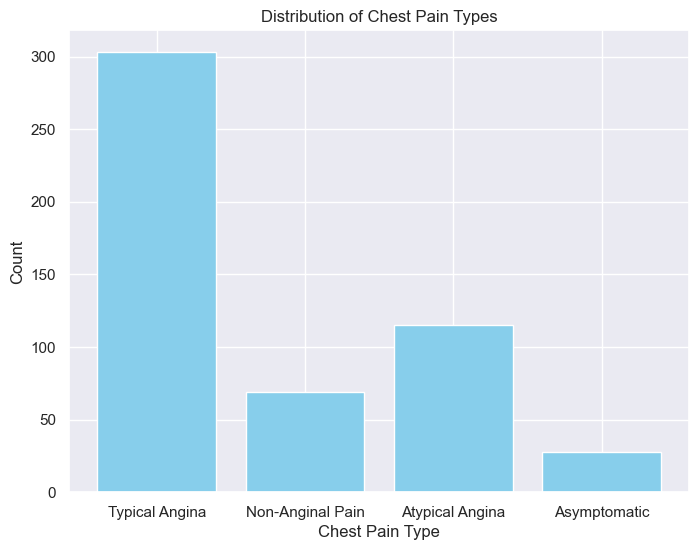

In [436]:
# Chest Pain Type Analysis
chest_pain_counts = data['cp'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(chest_pain_counts.index, chest_pain_counts.values, color='skyblue')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.title('Distribution of Chest Pain Types')
plt.xticks(chest_pain_counts.index, ['Typical Angina', 'Atypical Angina', 'Non-Anginal Pain', 'Asymptomatic'])
plt.show()


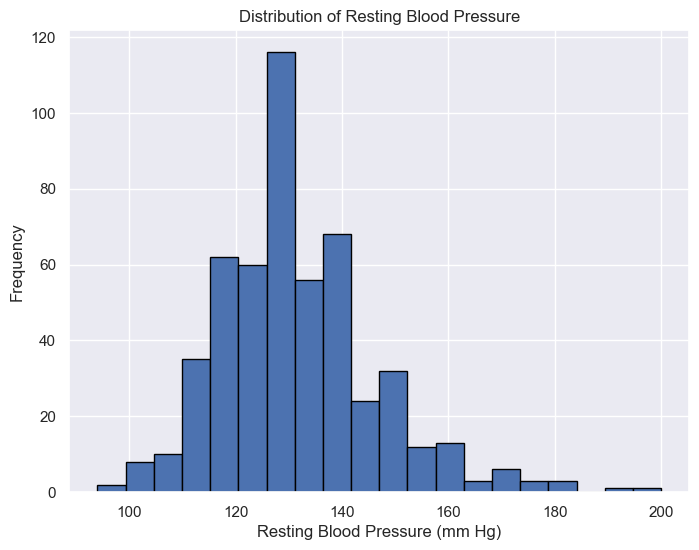

In [437]:
# Resting Blood Pressure Analysis
plt.figure(figsize=(8, 6))
plt.hist(data['trestbps'], bins=20, edgecolor='black')
plt.xlabel('Resting Blood Pressure (mm Hg)')
plt.ylabel('Frequency')
plt.title('Distribution of Resting Blood Pressure')
plt.grid(True)
plt.show()


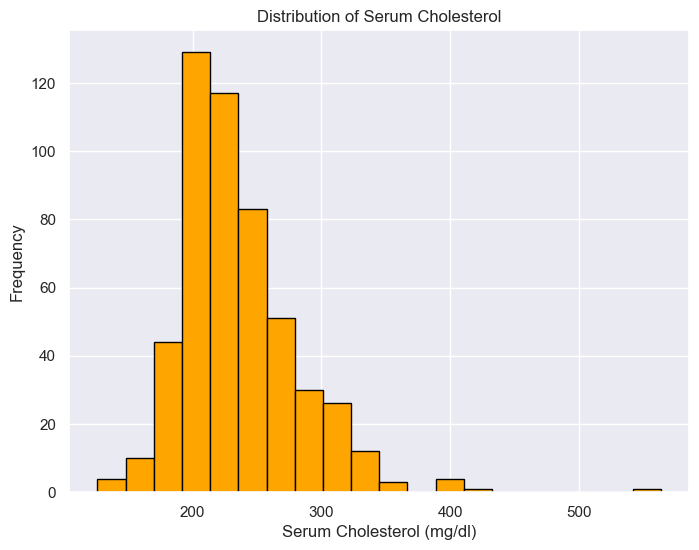

In [438]:
# Serum Cholesterol Analysis
plt.figure(figsize=(8, 6))
plt.hist(data['chol'], bins=20, color='orange', edgecolor='black')
plt.xlabel('Serum Cholesterol (mg/dl)')
plt.ylabel('Frequency')
plt.title('Distribution of Serum Cholesterol')
plt.grid(True)
plt.show()


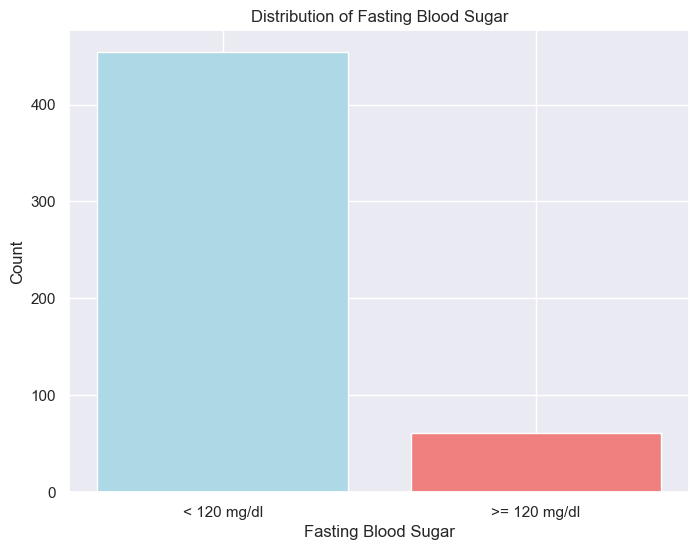

In [439]:
# Fasting Blood Sugar Analysis
fbs_counts = data['fbs'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(fbs_counts.index, fbs_counts.values, color=['lightblue', 'lightcoral'])
plt.xticks(fbs_counts.index, ['< 120 mg/dl', '>= 120 mg/dl'])
plt.xlabel('Fasting Blood Sugar')
plt.ylabel('Count')
plt.title('Distribution of Fasting Blood Sugar')
plt.show()


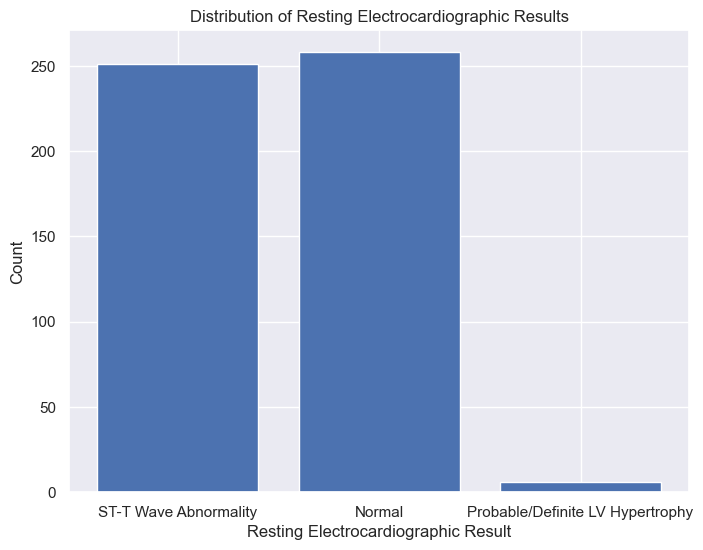

In [440]:
# Resting Electrocardiographic Analysis
restecg_counts = data['restecg'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(restecg_counts.index, restecg_counts.values)
plt.xticks(restecg_counts.index, ['Normal', 'ST-T Wave Abnormality', 'Probable/Definite LV Hypertrophy'])
plt.xlabel('Resting Electrocardiographic Result')
plt.ylabel('Count')
plt.title('Distribution of Resting Electrocardiographic Results')
plt.show()


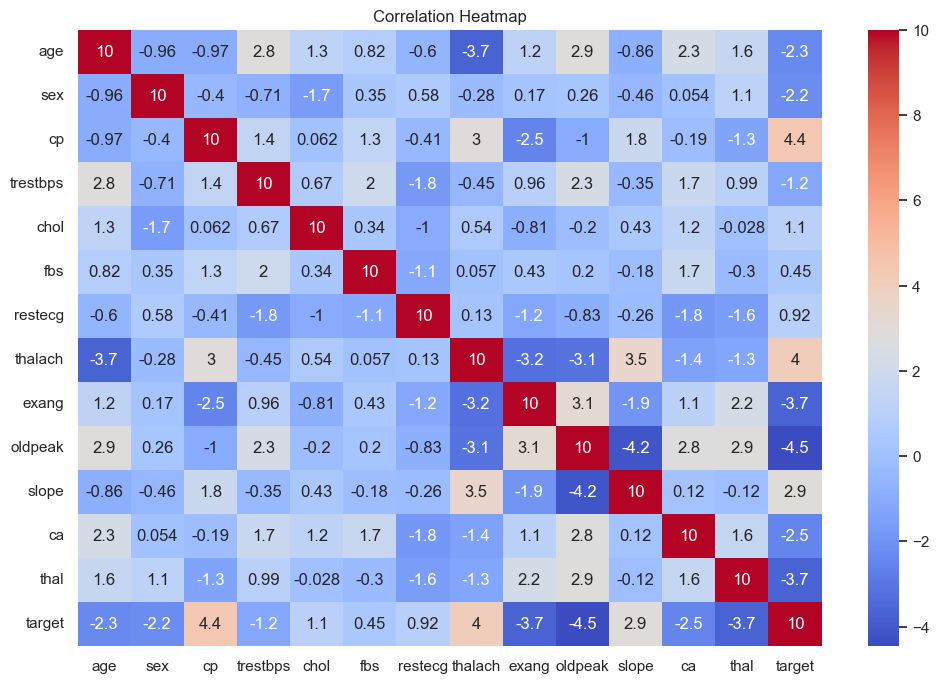

In [441]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr()*10, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [442]:
def plotAge():
    facet_grid = sns.FacetGrid(data, hue='target')
    facet_grid.map(sns.kdeplot, "age", shade=True, ax=axes[0])
    axes[0].legend(title='target')  # Add this line to create a legend
    legend_labels = ['disease false', 'disease true']
    for t, l in zip(axes[0].get_legend().texts, legend_labels):
        t.set_text(l)
    axes[0].set(xlabel='age', ylabel='density')

    avg = data[["age", "target"]].groupby(['age'], as_index=False).mean()
    sns.barplot(x='age', y='target', data=avg, ax=axes[1])
    axes[1].set(xlabel='age', ylabel='disease probability')

    plt.clf()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


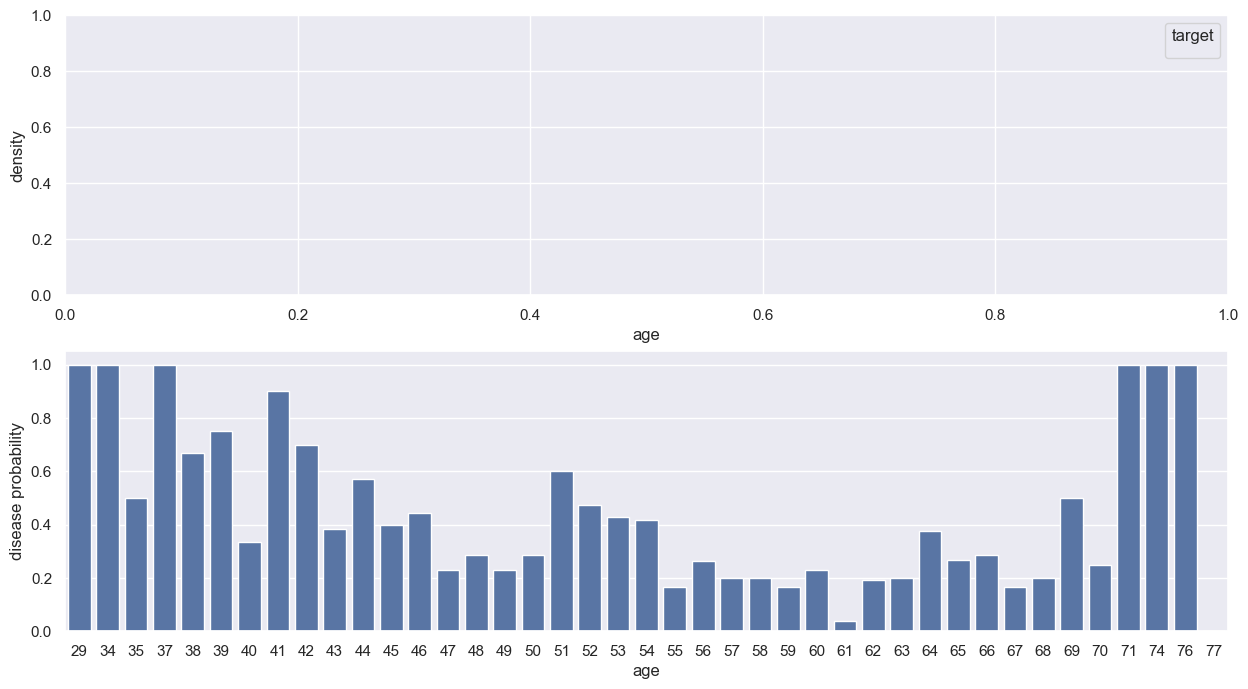

<Figure size 300x300 with 0 Axes>

In [443]:
fig_age, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 8))
plotAge()

### Here 0 is female and 1 is male patients

In [444]:
countFemale = len(data[data.sex == 0])
countMale = len(data[data.sex == 1])
print("Percentage of Female Patients:{:.2f}%".format((countFemale)/(len(data.sex))*100))
print("Percentage of Male Patients:{:.2f}%".format((countMale)/(len(data.sex))*100))

Percentage of Female Patients:28.93%
Percentage of Male Patients:71.07%


In [445]:
categorial = [('sex', ['female', 'male']),
              ('cp', ['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic']),
              ('fbs', ['fbs > 120mg', 'fbs < 120mg']),
              ('restecg', ['normal', 'ST-T wave', 'left ventricular']),
              ('exang', ['yes', 'no']),
              ('slope', ['upsloping', 'flat', 'downsloping']),
              ('thal', ['normal', 'fixed defect', 'reversible defect'])]

In [446]:
def plotGrid(isCategorial):
    if isCategorial:
        [plotCategorial(x[0], x[1], i) for i, x in enumerate(categorial)]
    else:
        [plotContinuous(x[0], x[1], i) for i, x in enumerate(continuous)]

In [447]:
def plotCategorial(attribute, labels, ax_index):
    sns.countplot(x=attribute, data=data, ax=axes[ax_index][0])
    sns.countplot(x='target', hue=attribute, data=data, ax=axes[ax_index][1])
    avg = data[[attribute, 'target']].groupby([attribute], as_index=False).mean()
    sns.barplot(x=attribute, y='target', hue=attribute, data=avg, ax=axes[ax_index][2])

    for t, l in zip(axes[ax_index][1].get_legend().texts, labels):
        t.set_text(l)
    for t, l in zip(axes[ax_index][2].get_legend().texts, labels):
        t.set_text(l)


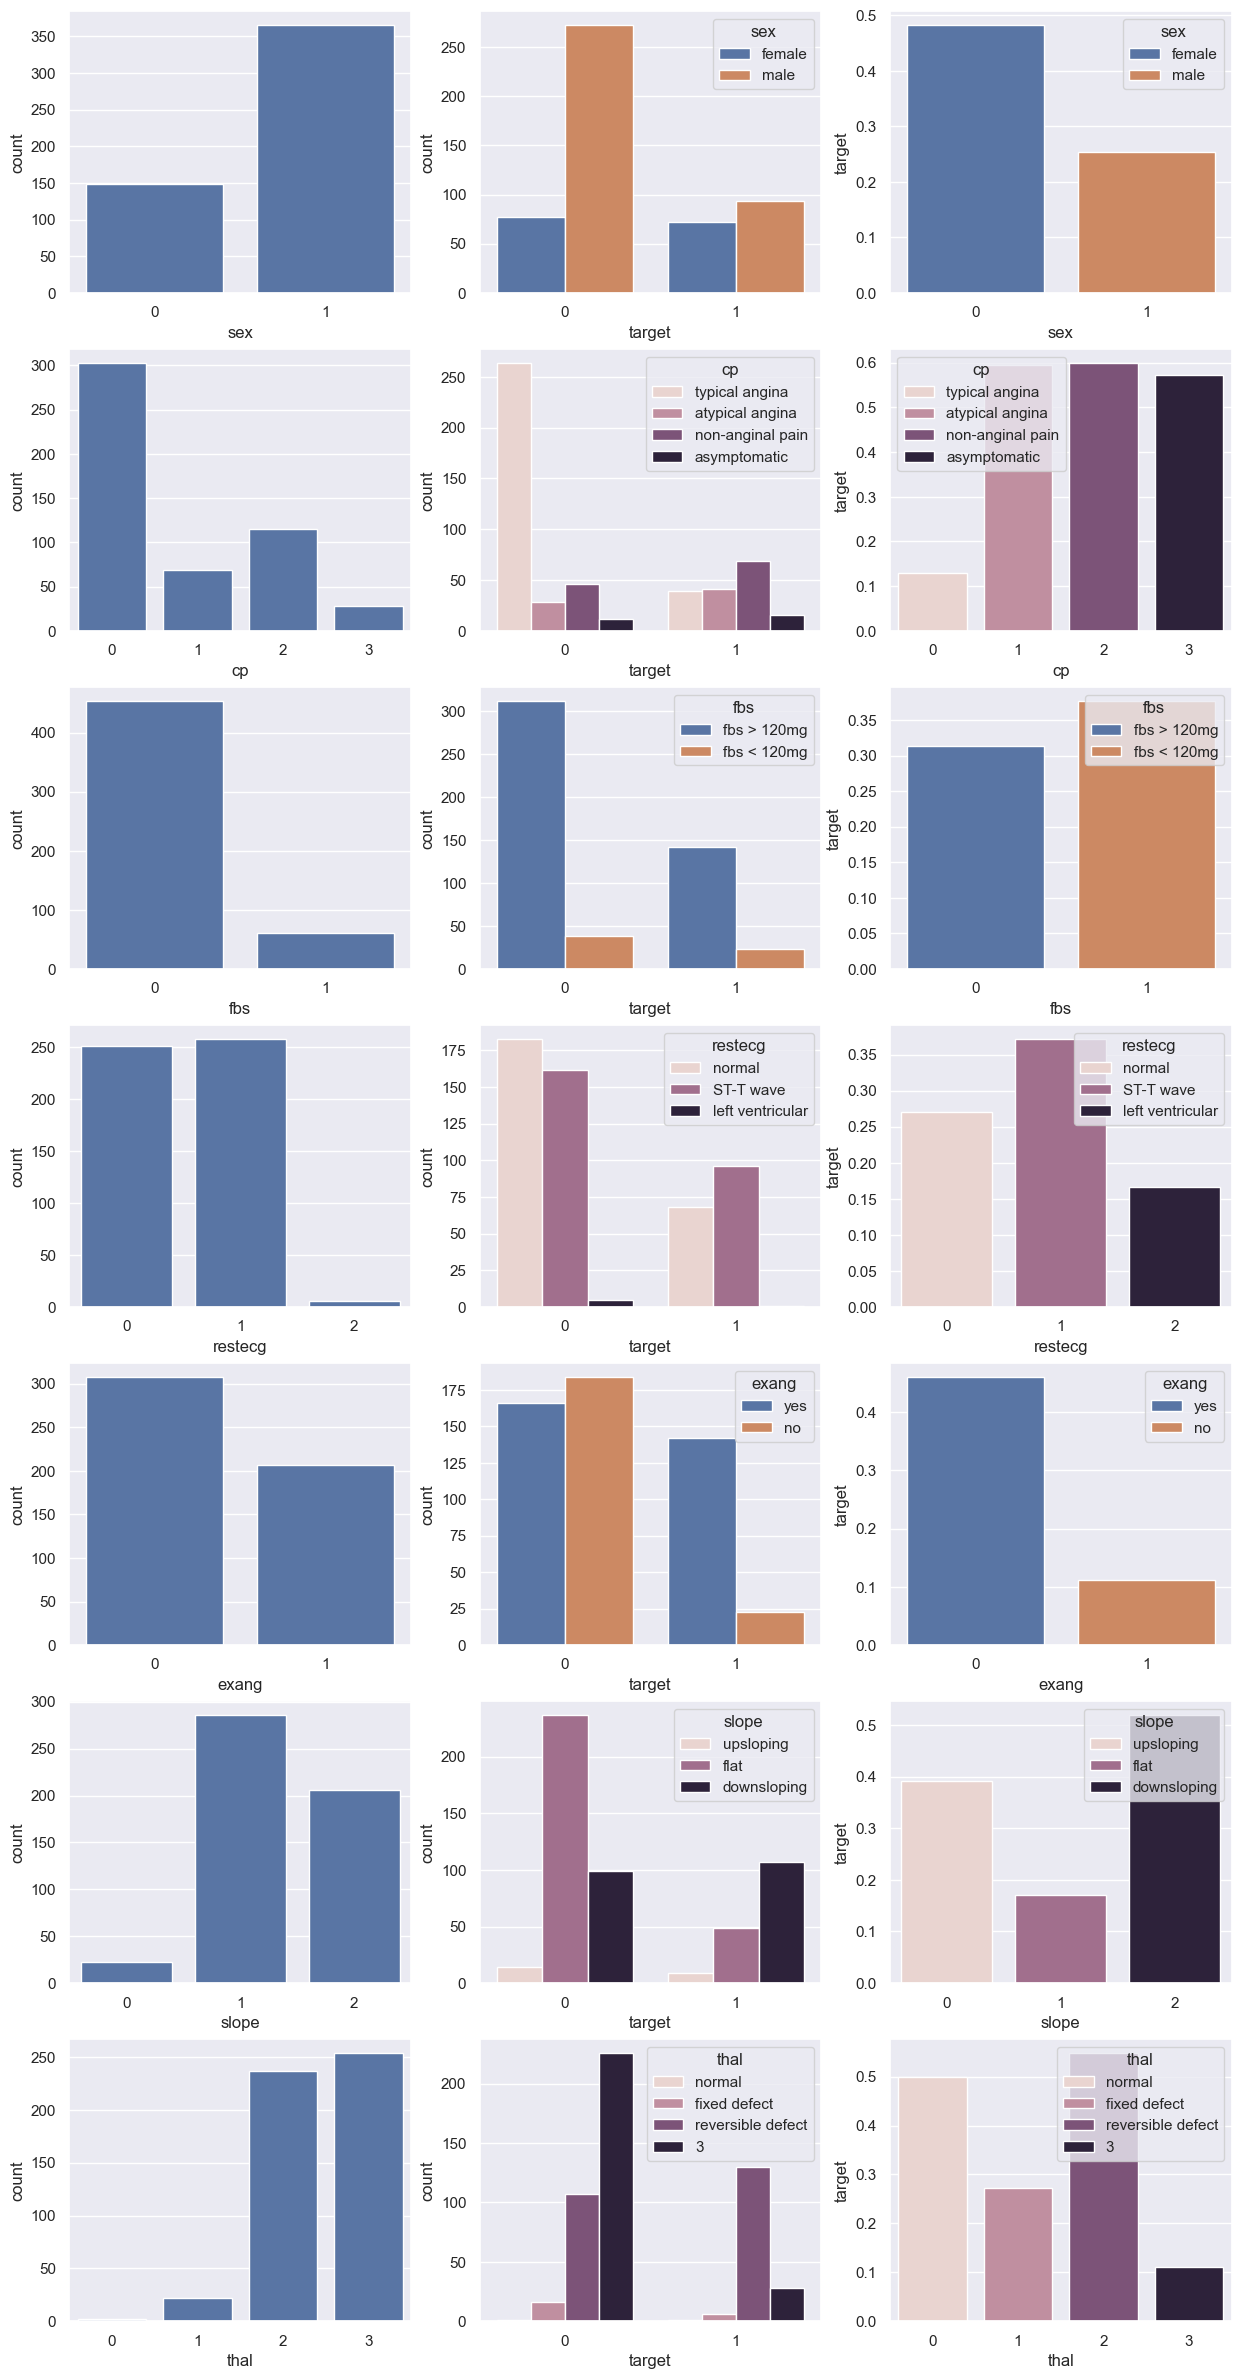

In [448]:
fig_categorial, axes = plt.subplots(nrows=len(categorial), ncols=3, figsize=(15, 30))

plotGrid(isCategorial=True)

In [449]:
continuous = [('trestbps', 'blood pressure in mm Hg'),
              ('chol', 'serum cholestoral in mg/d'),
              ('thalach', 'maximum heart rate achieved'),
              ('oldpeak', 'ST depression by exercise relative to rest'),
              ('ca', '# major vessels: (0-3) colored by flourosopy')]

In [450]:
def plotContinuous(attribute, xlabel, ax_index):
    sns.distplot(data[[attribute]], ax=axes[ax_index][0])
    axes[ax_index][0].set(xlabel=xlabel, ylabel='density')
    sns.violinplot(x='target', y=attribute, data=data, ax=axes[ax_index][1])

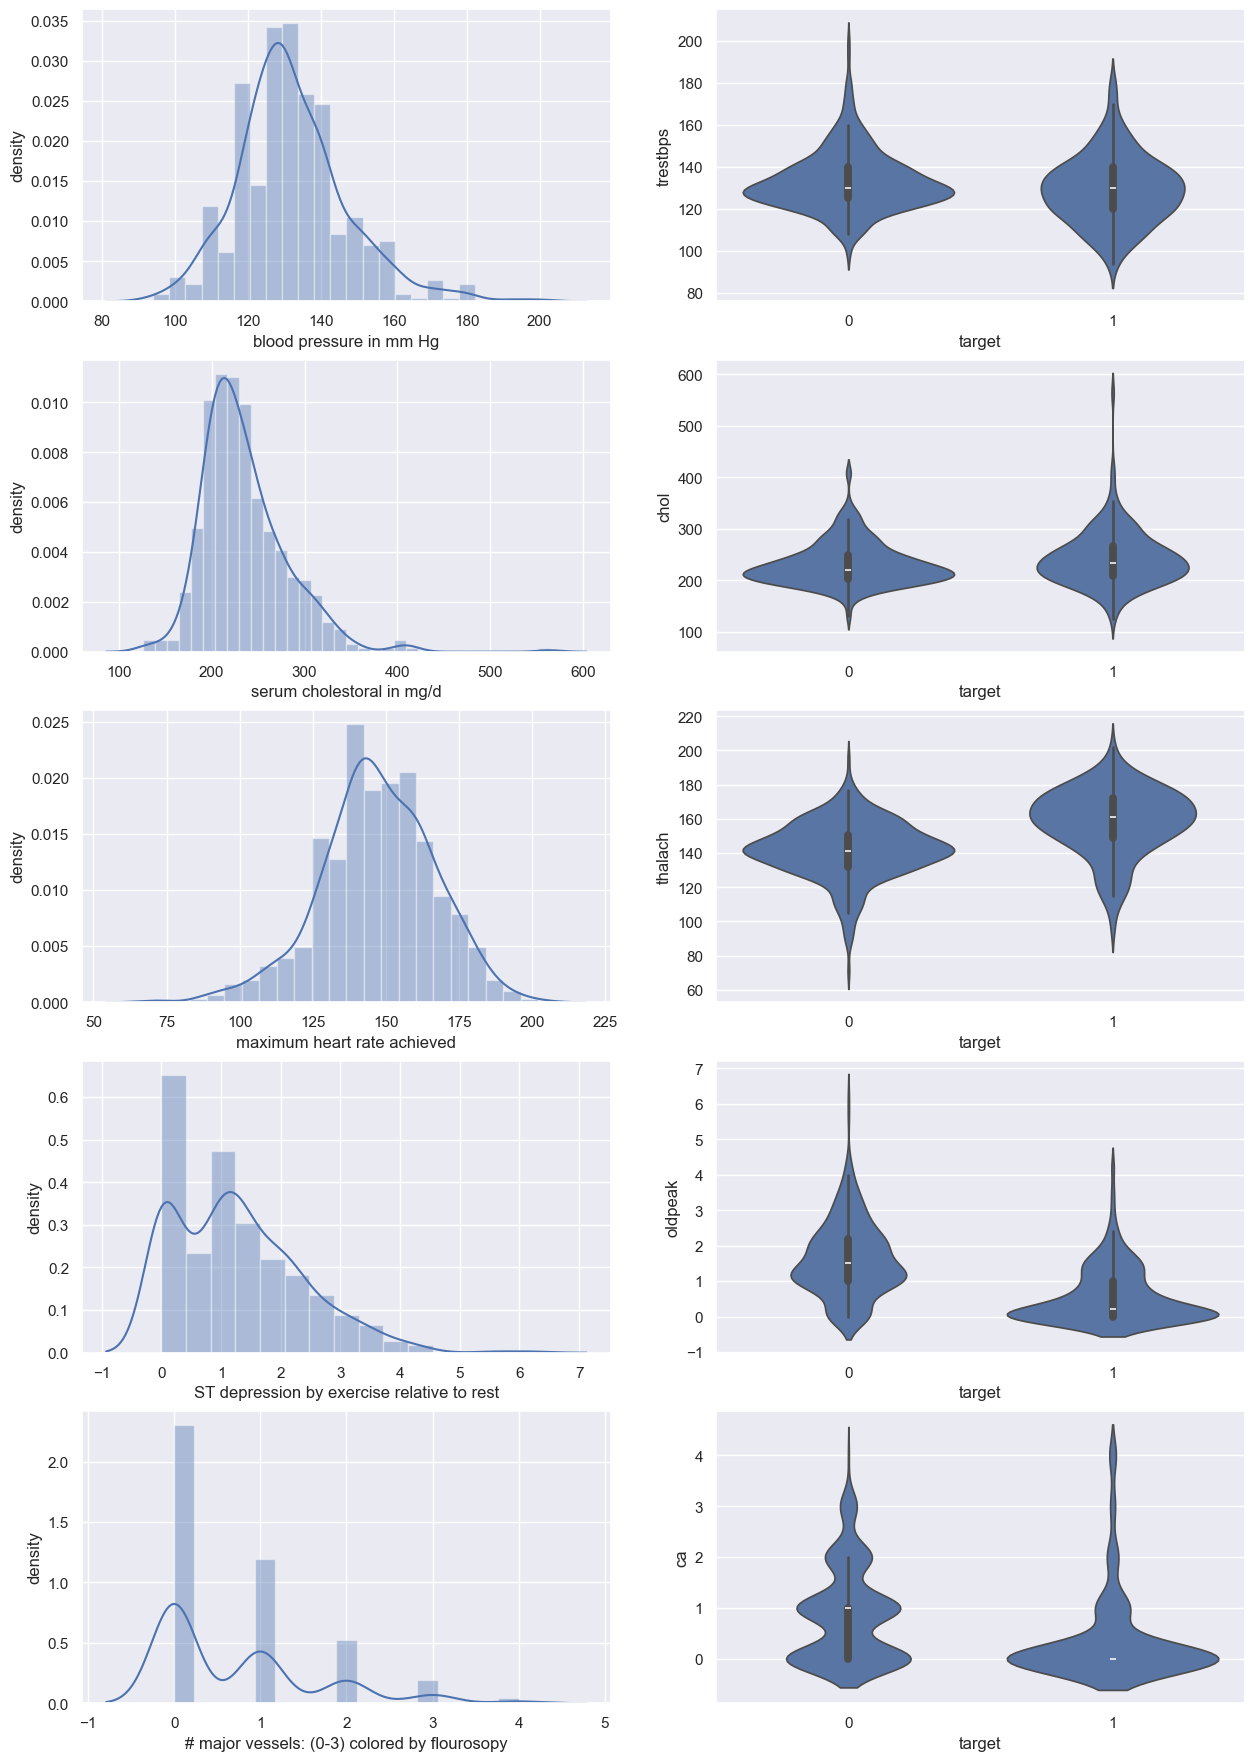

In [451]:
fig_continuous, axes = plt.subplots(nrows=len(continuous), ncols=2, figsize=(15, 22))

plotGrid(isCategorial=False)

# Heart Disease Frequency for ages

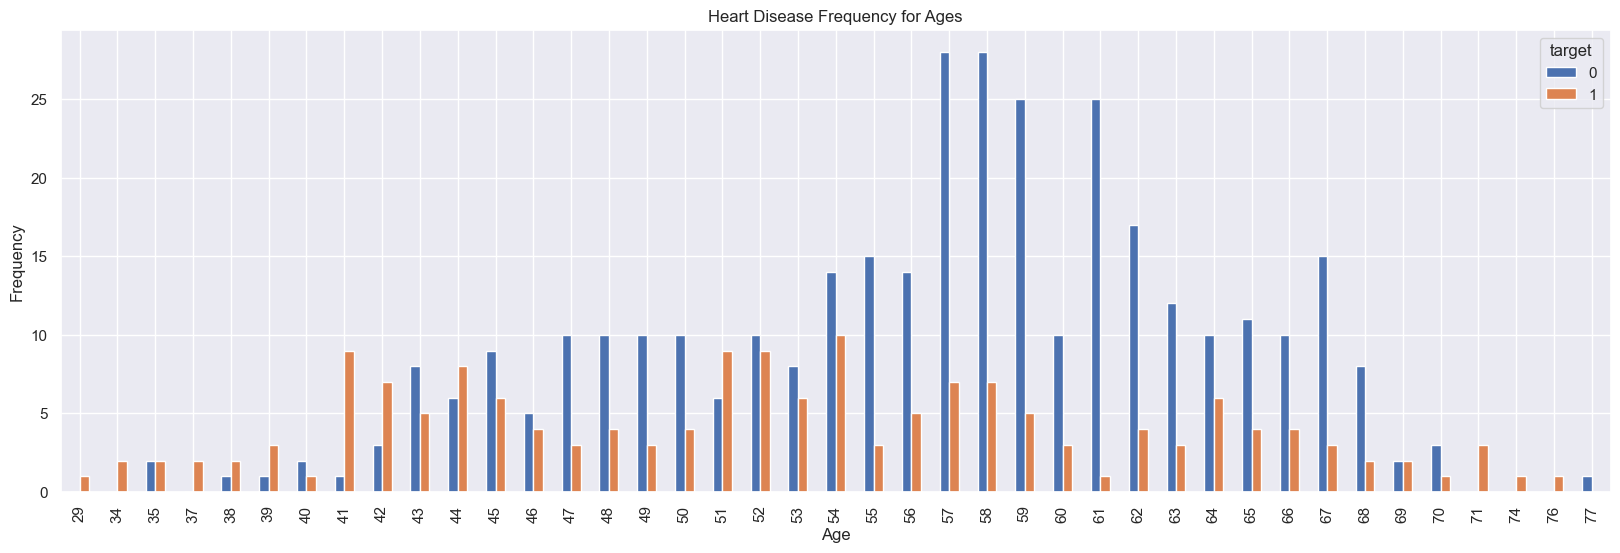

In [452]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

# Heart Disease frequency for sex (where 0 is female and 1 is male and "red" is have heart disease and "blue" is don't have heart disease)

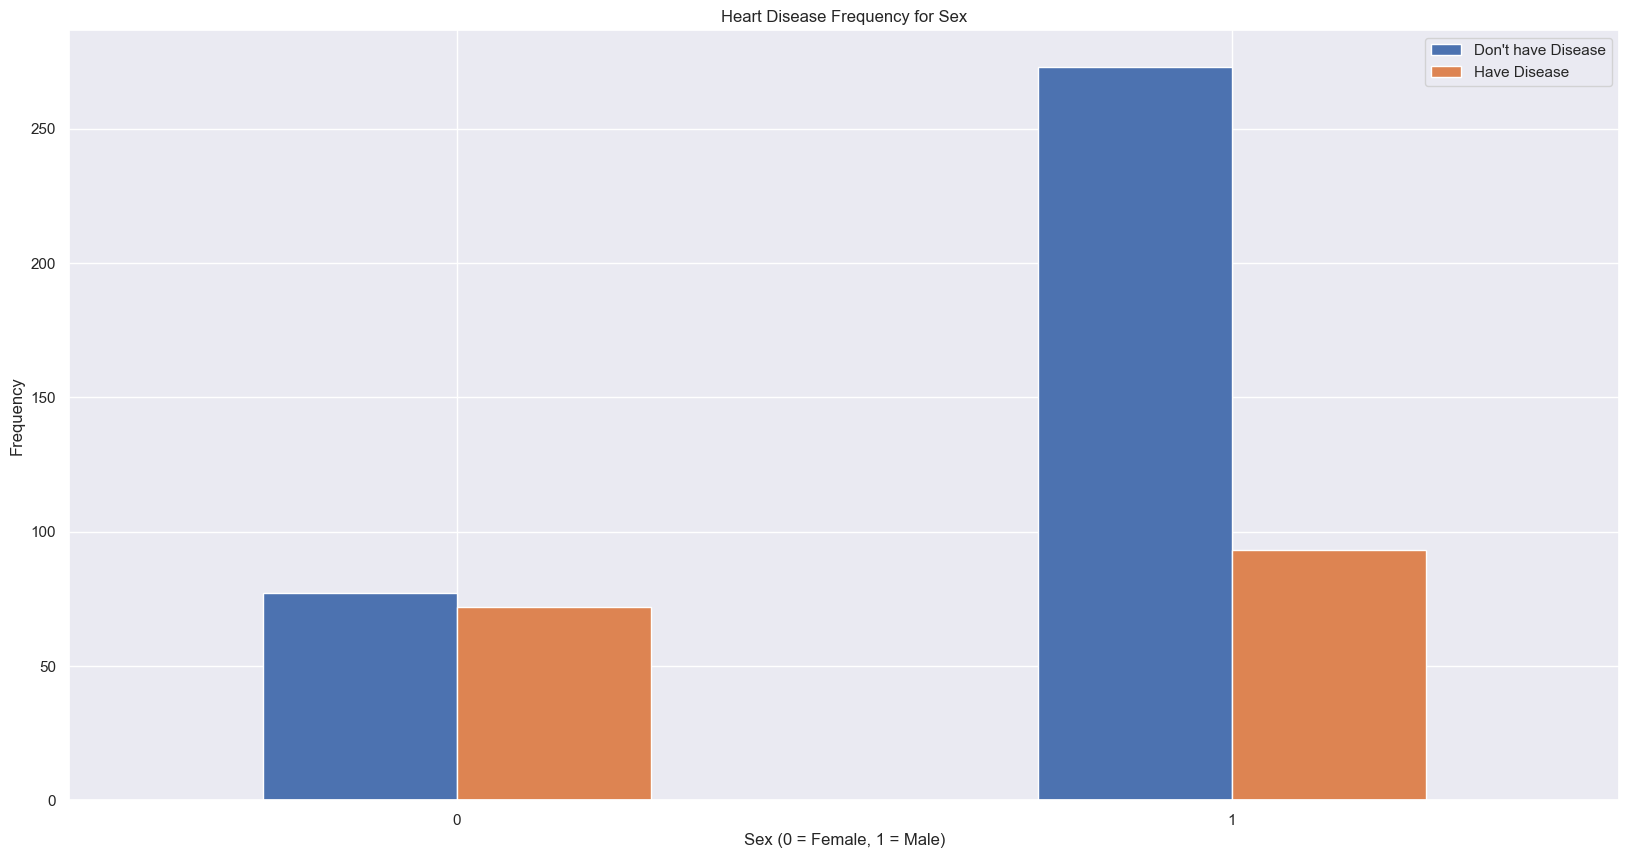

In [453]:
pd.crosstab(data.sex,data.target).plot(kind="bar",figsize=(20,10))
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Don't have Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

In [454]:
data.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

In [455]:
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Heart disease according to Fasting Blood sugar

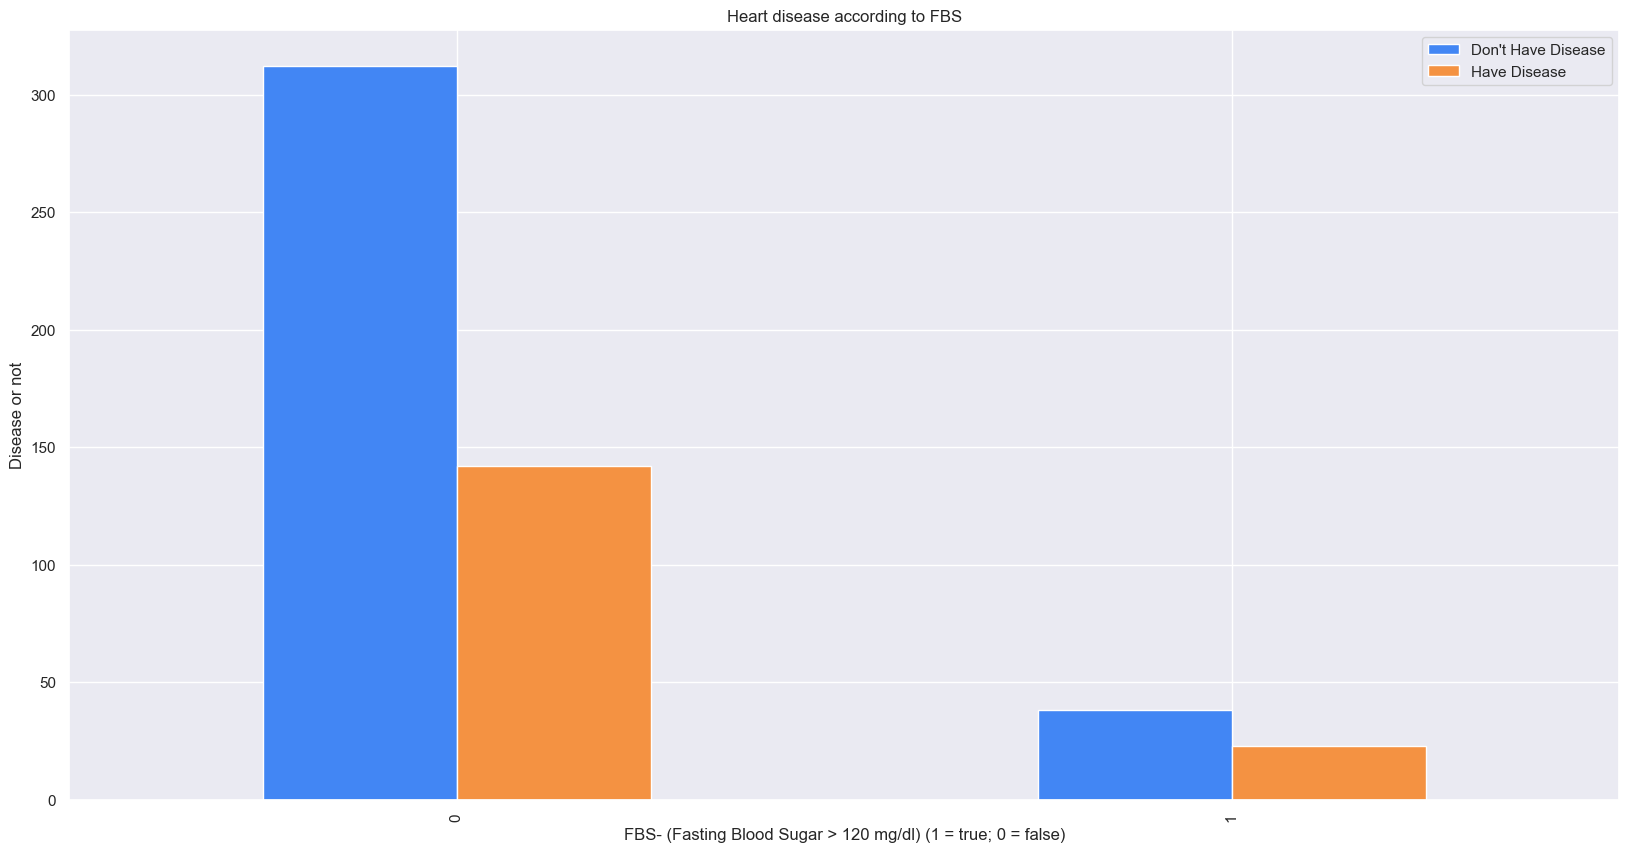

In [456]:
pd.crosstab(data.fasting_blood_sugar,data.target).plot(kind="bar",figsize=(20,10),color=['#4286f4','#f49242'])
plt.title("Heart disease according to FBS")
plt.xlabel('FBS- (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation=90)
plt.legend(["Don't Have Disease", "Have Disease"])
plt.ylabel('Disease or not')
plt.show()

# Analysing the chest pain (4 types of chest pain)

#[Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic]

In [457]:
data["chest_pain_type"].unique()

array([3, 2, 1, 0], dtype=int64)

<Axes: xlabel='chest_pain_type', ylabel='target'>

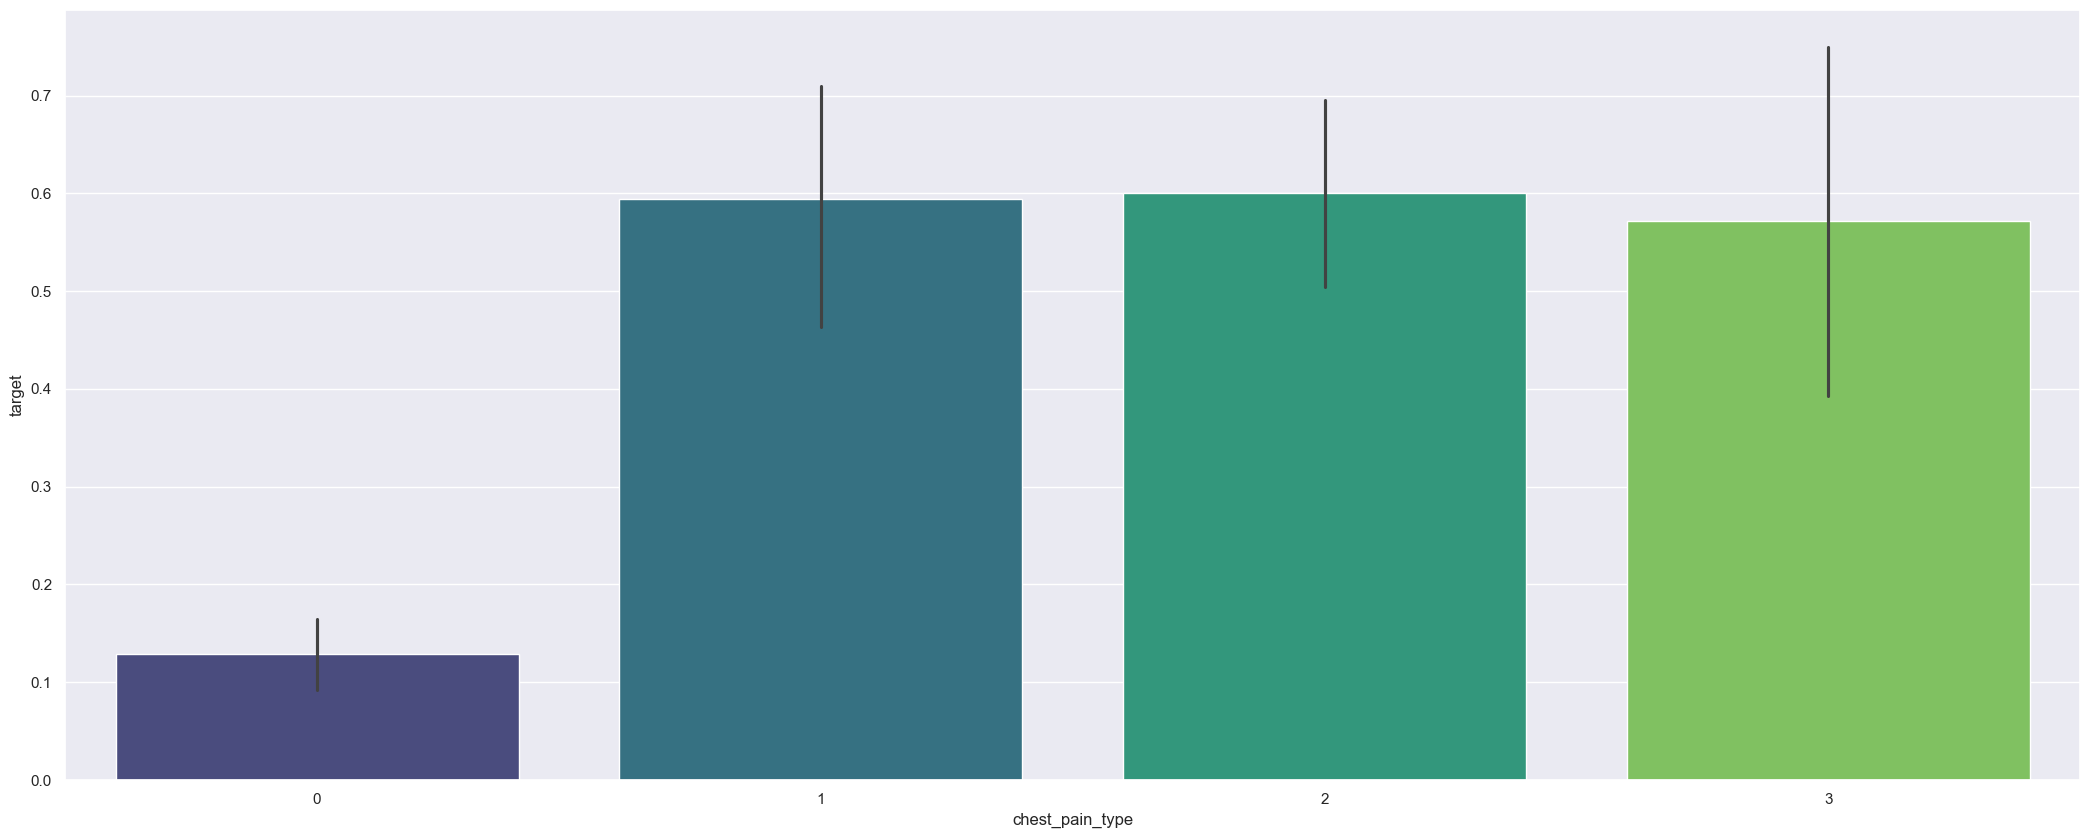

In [458]:
plt.figure(figsize=(26, 10))
sns.barplot(data, x="chest_pain_type", y='target', palette="viridis")

# Analysing The person's resting blood pressure (mm Hg on admission to the hospital)

In [459]:
data["resting_blood_pressure"].unique()

array([145, 130, 120, 140, 172, 150, 110, 135, 160, 105, 125, 142, 155,
       104, 138, 128, 108, 134, 122, 115, 118, 100, 124,  94, 112, 102,
       152, 101, 132, 148, 178, 129, 180, 136, 126, 106, 156, 170, 146,
       117, 200, 165, 174, 192, 144, 123, 154, 114, 164, 158, 127, 157],
      dtype=int64)

<Axes: xlabel='resting_blood_pressure', ylabel='target'>

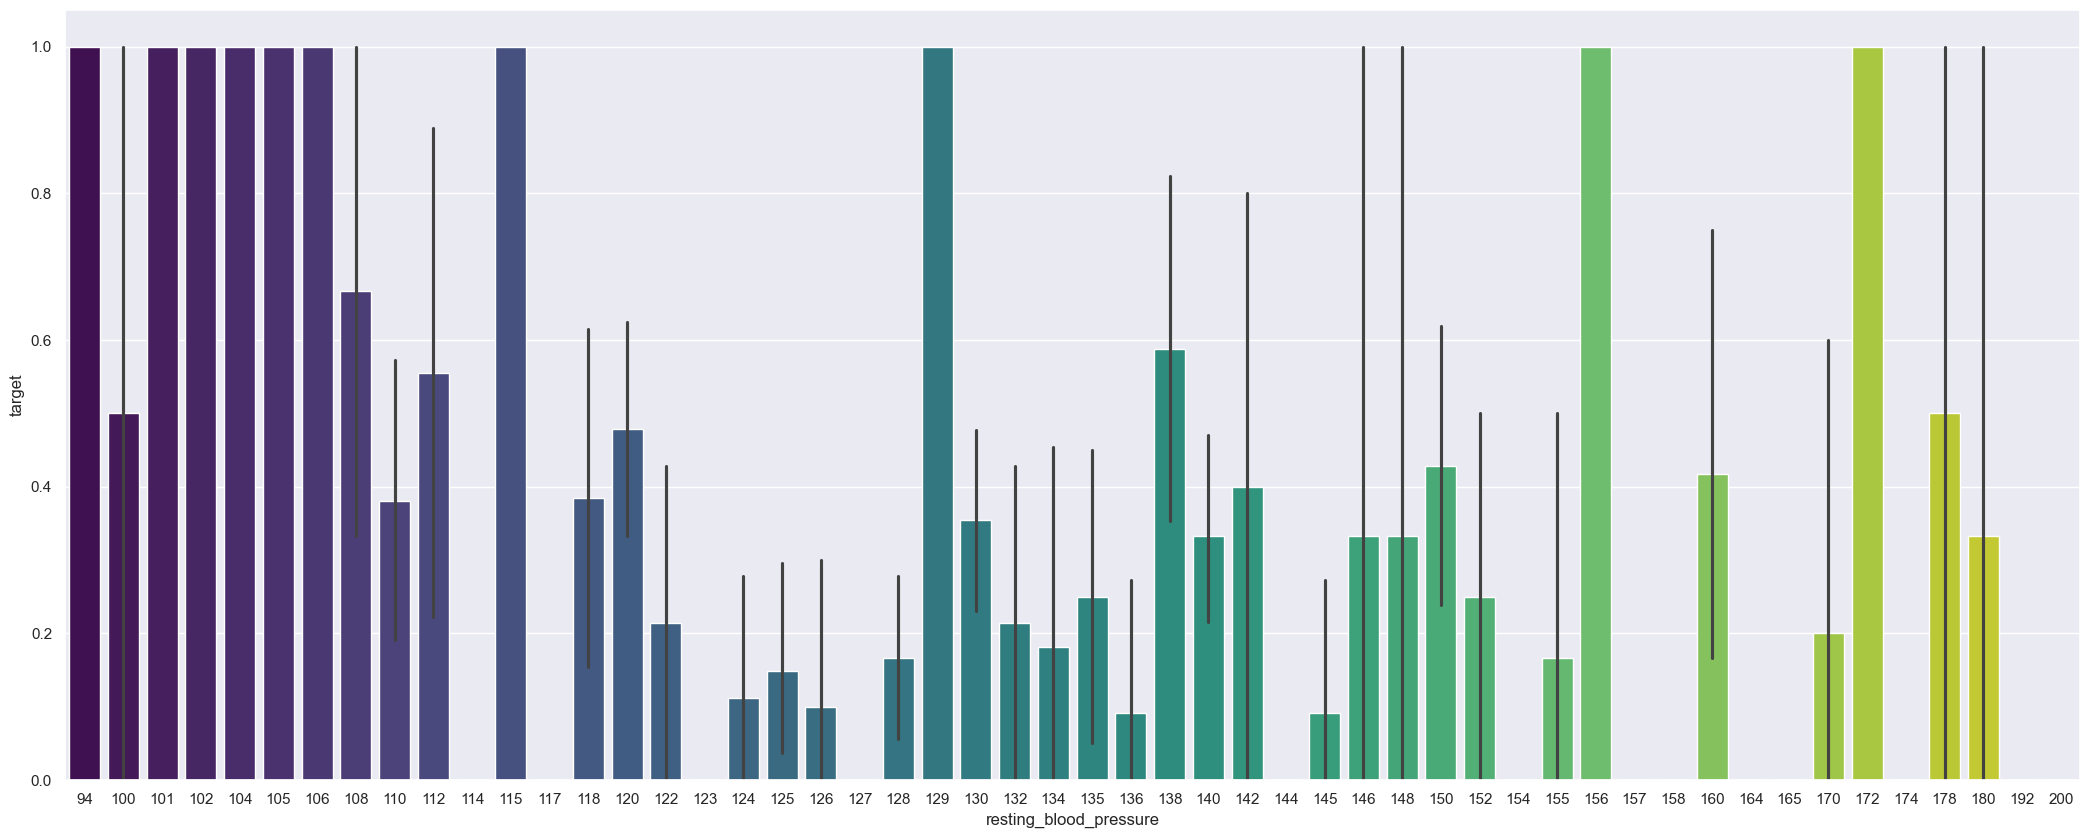

In [460]:
plt.figure(figsize=(26, 10))
sns.barplot(data, x="resting_blood_pressure",y="target", palette="viridis")

# Analysing the Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

In [461]:
data["rest_ecg"].unique()

array([0, 1, 2], dtype=int64)

<Axes: xlabel='rest_ecg', ylabel='target'>

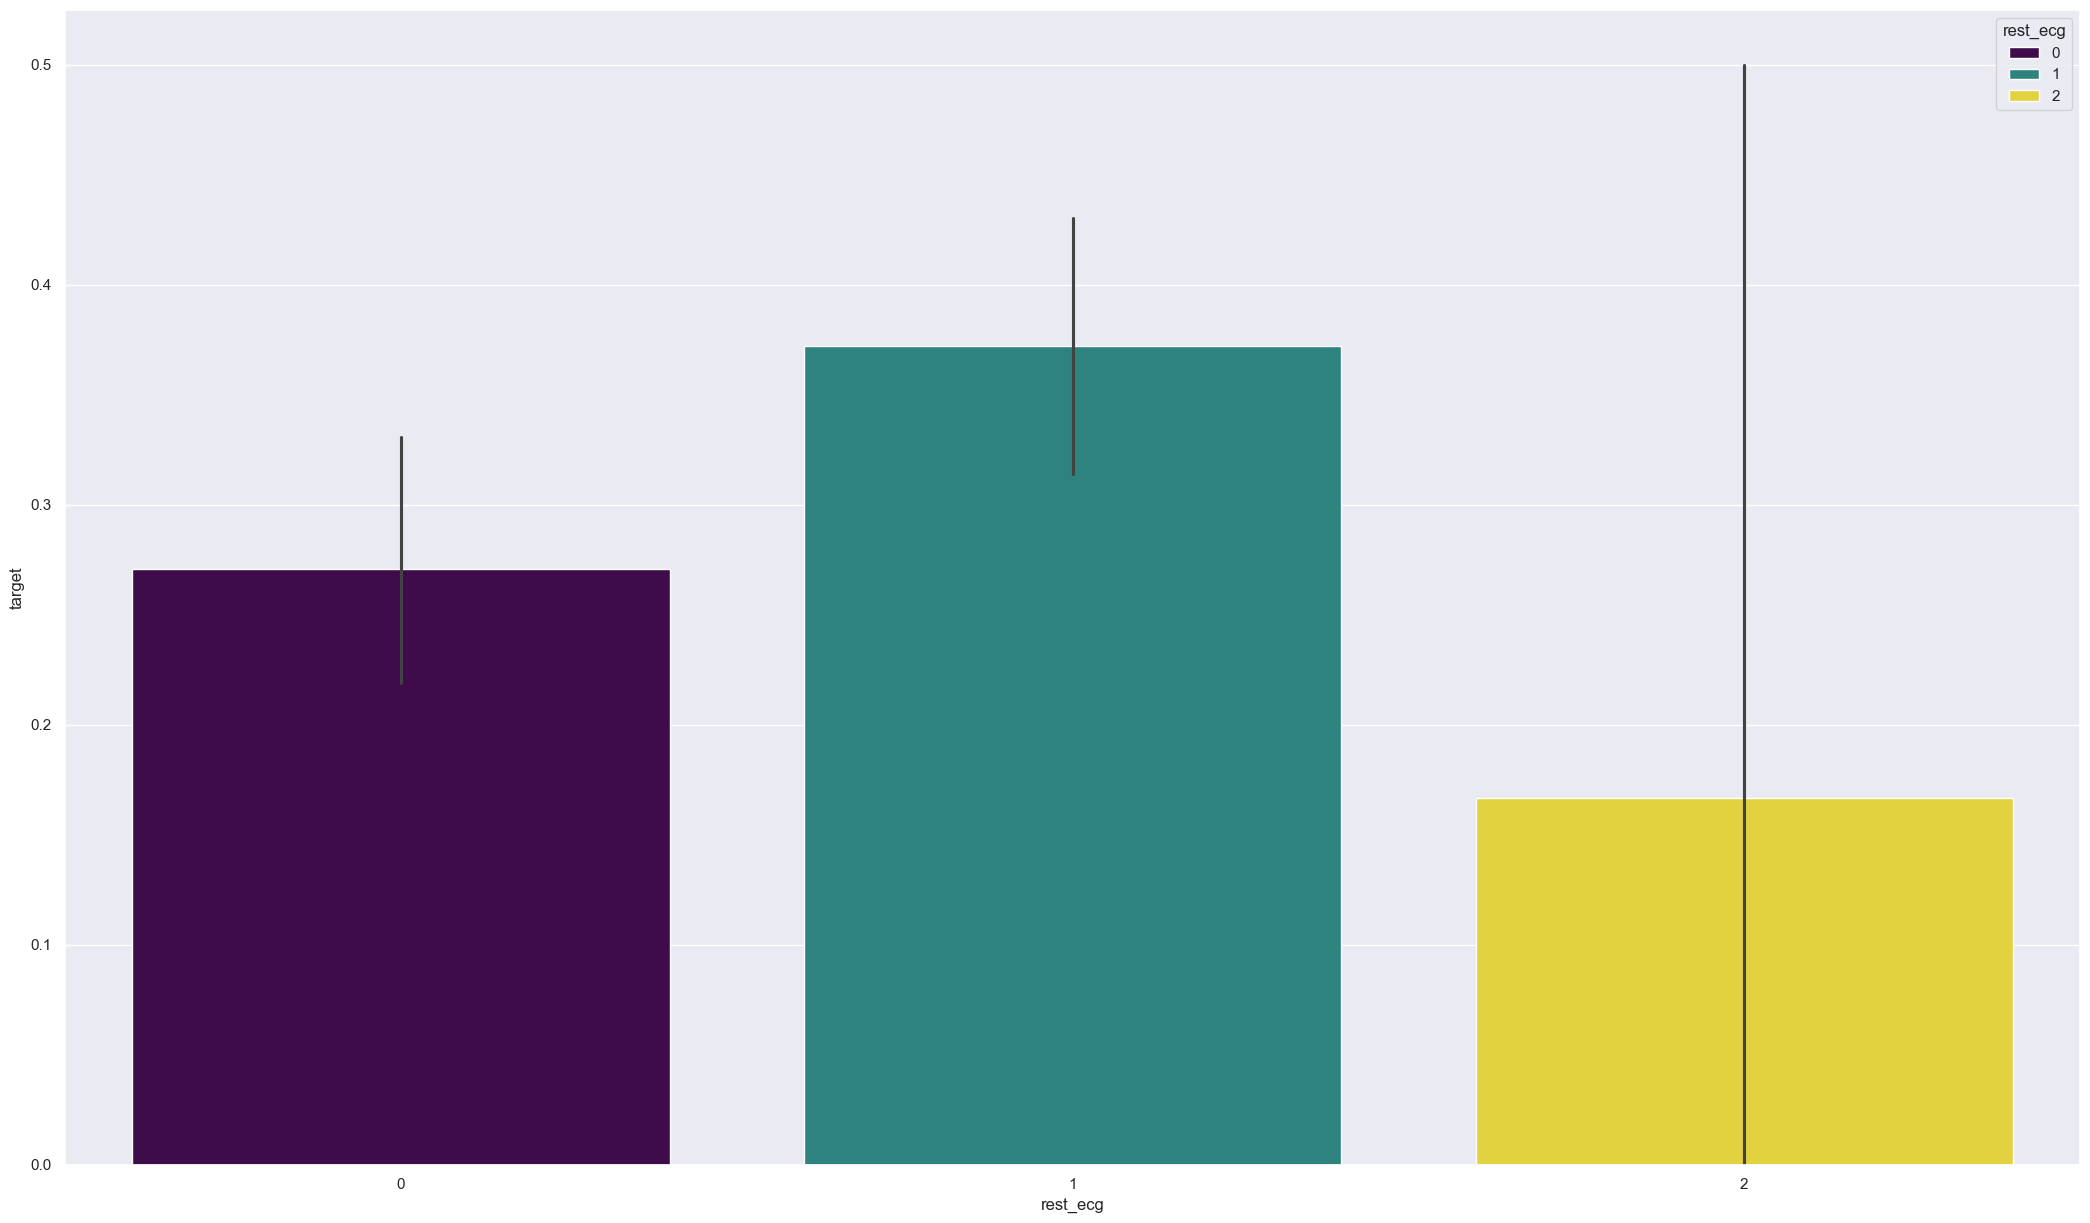

In [462]:
plt.figure(figsize=(26, 15))
sns.barplot(data, x="rest_ecg", y="target", hue="rest_ecg", palette="viridis")

## people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'

# Analysing Exercise induced angina (1 = yes; 0 = no)

In [463]:
data["exercise_induced_angina"].unique()

array([0, 1], dtype=int64)

<Axes: xlabel='exercise_induced_angina', ylabel='target'>

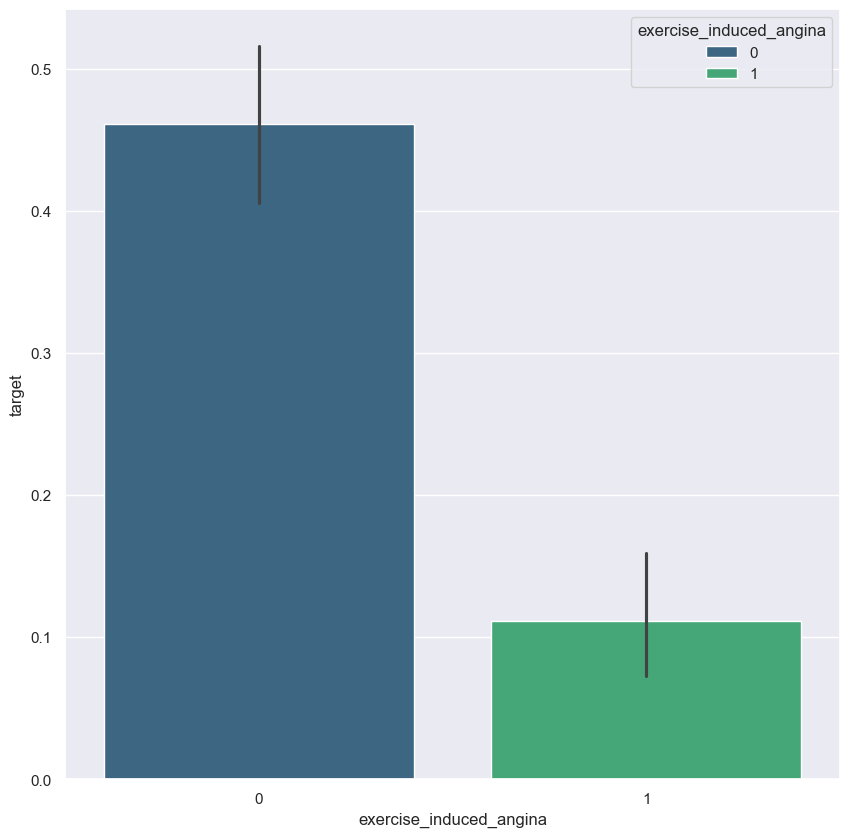

In [464]:
plt.figure(figsize=(10, 10))
sns.barplot(data, x="exercise_induced_angina", y="target", hue="exercise_induced_angina", palette="viridis")

###People with exercise_induced_angina=1 are much less likely to have heart problems

# Analysing the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

In [465]:
data["st_slope"].unique()

array([0, 2, 1], dtype=int64)

<Axes: xlabel='st_slope', ylabel='target'>

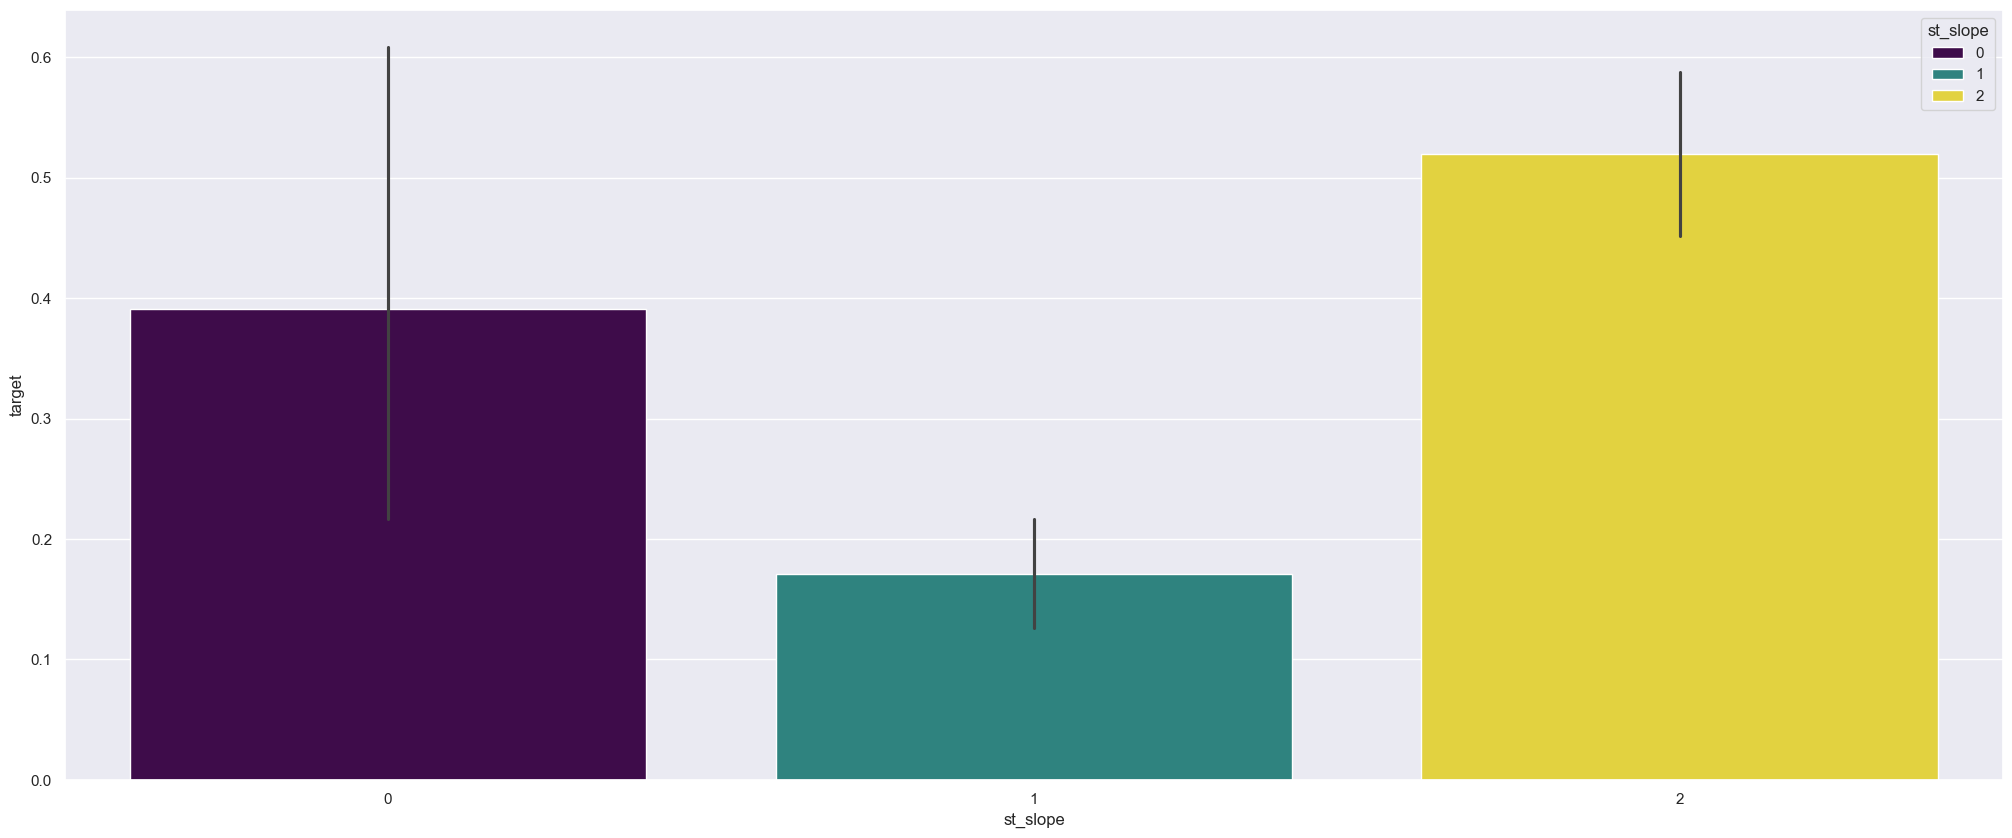

In [466]:
plt.figure(figsize=(25, 10))
sns.barplot(data, x = "st_slope", y="target", hue="st_slope", palette="viridis")

Slope '2' causes heart pain much more than Slope '0' and '1'

# Analysing number of major vessels (0-3) colored by flourosopy

In [467]:
data["num_major_vessels"].unique()

array([0, 2, 1, 3, 4], dtype=int64)

### count num_major vessels

<Axes: xlabel='num_major_vessels', ylabel='count'>

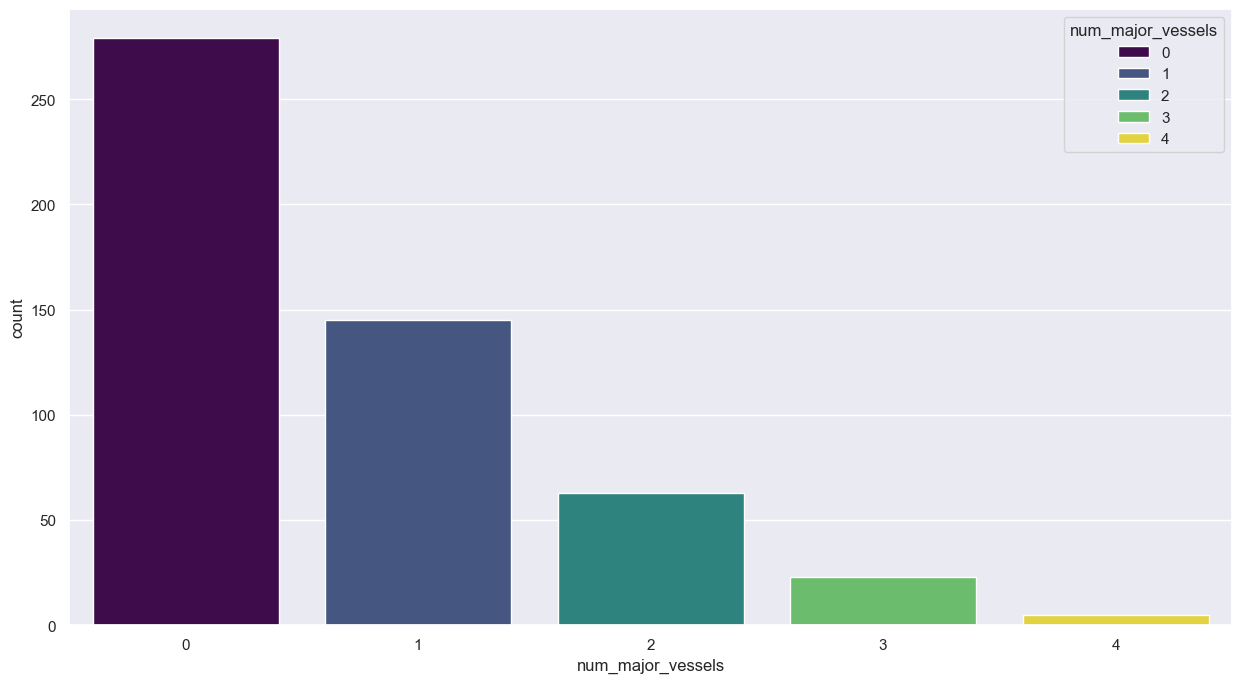

In [468]:
sns.countplot(data, x = "num_major_vessels", hue="num_major_vessels", palette="viridis")

### comparing with target

<Axes: xlabel='num_major_vessels', ylabel='target'>

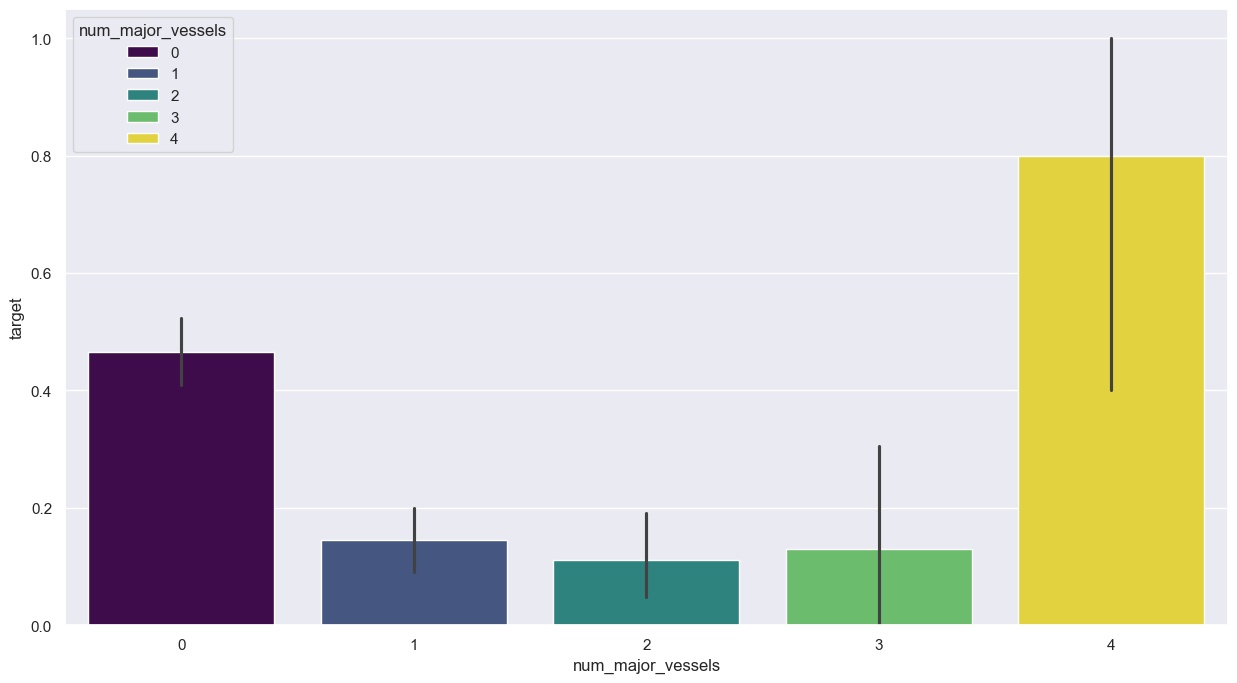

In [469]:
sns.barplot(data, x= "num_major_vessels", y = "target", hue="num_major_vessels", palette="viridis")

### num_major_vessels=4 has astonishingly large number of heart patients

# Analysing A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)



In [470]:
data["thalassemia"].unique()

array([1, 2, 3, 0], dtype=int64)

### plotting the thalassemia distribution (0,1,2,3)

<Axes: xlabel='thalassemia', ylabel='Density'>

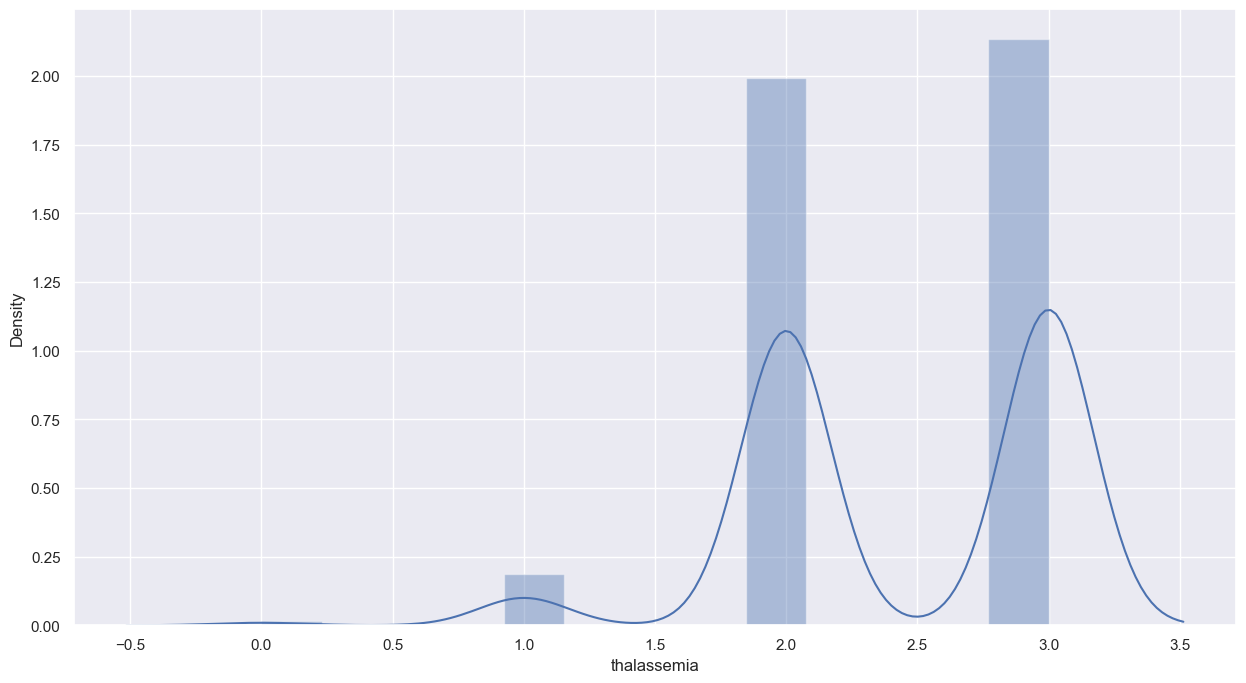

In [471]:
sns.distplot(data["thalassemia"])

### comparing with target

<Axes: xlabel='thalassemia', ylabel='target'>

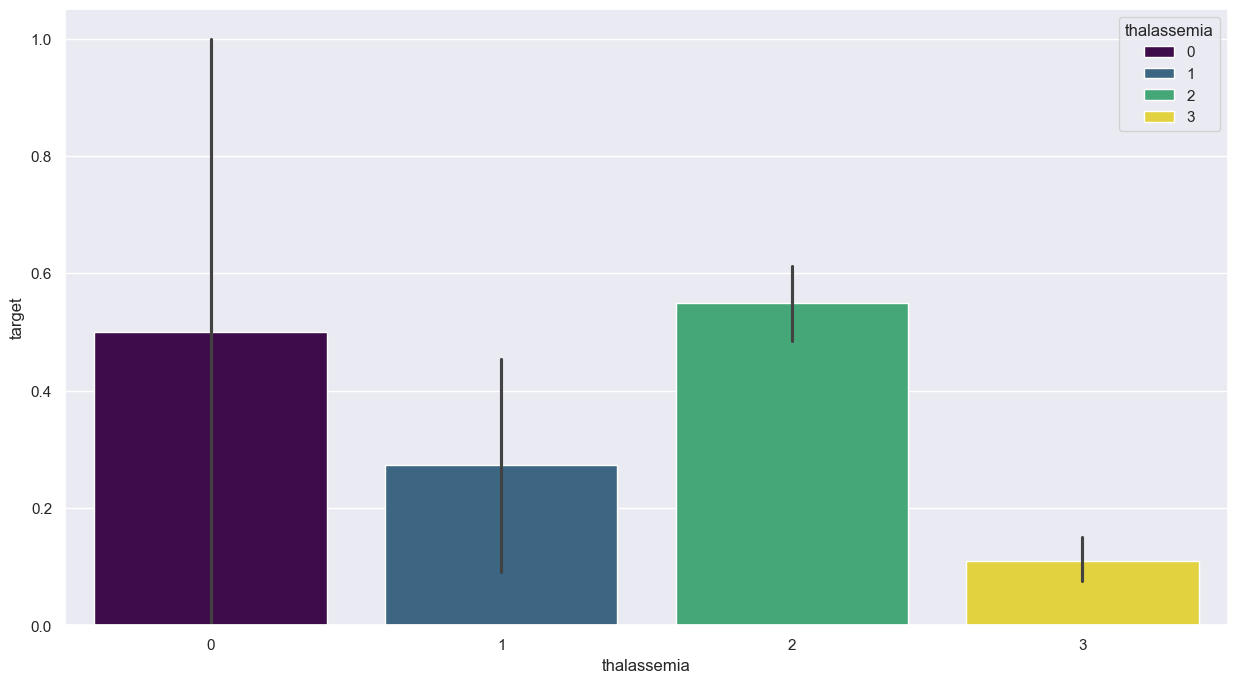

In [472]:
sns.barplot(data, x="thalassemia", y="target", hue="thalassemia", palette="viridis")

# thalassemia and cholesterol scatterplot

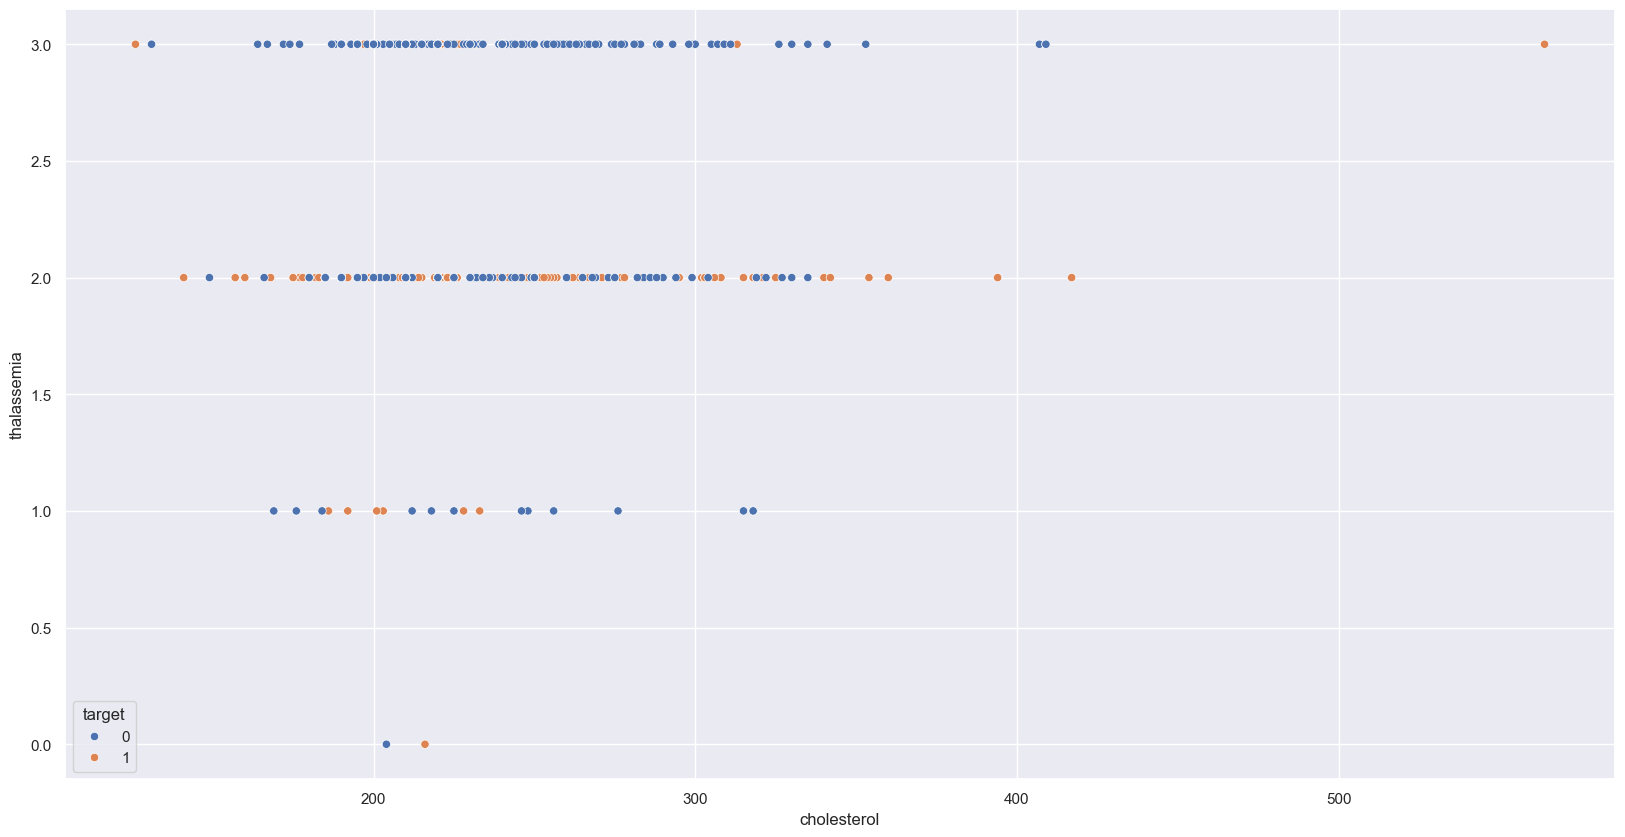

In [473]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='cholesterol',y='thalassemia',data=data,hue='target')
plt.show()

# thalassemia vs resting blood pressure scatterplot

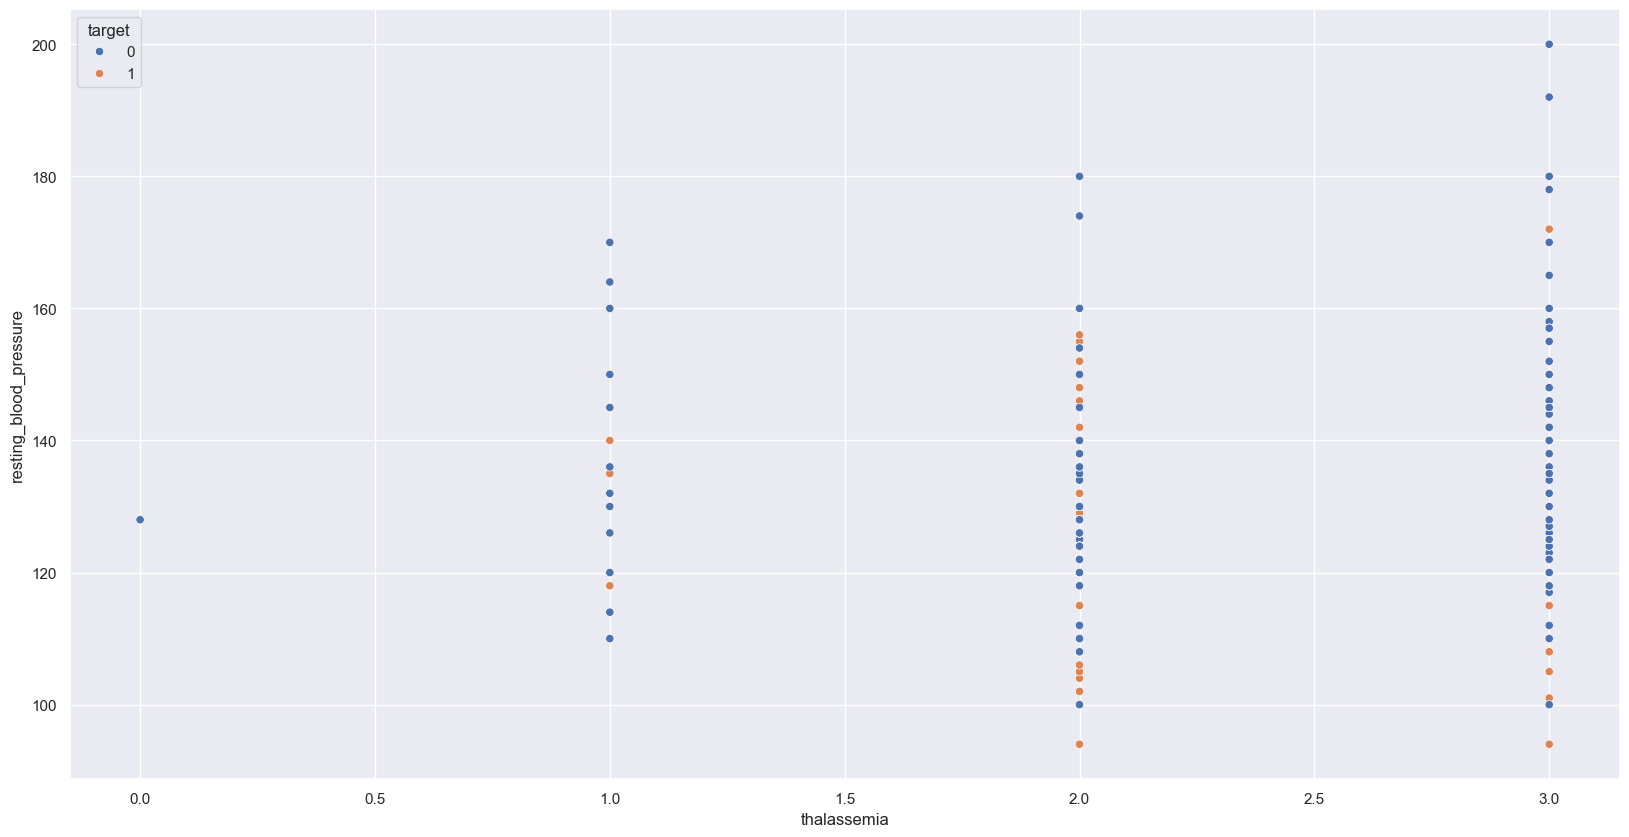

In [474]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='thalassemia',y='resting_blood_pressure',data=data,hue='target')
plt.show()

## Health rate vs age

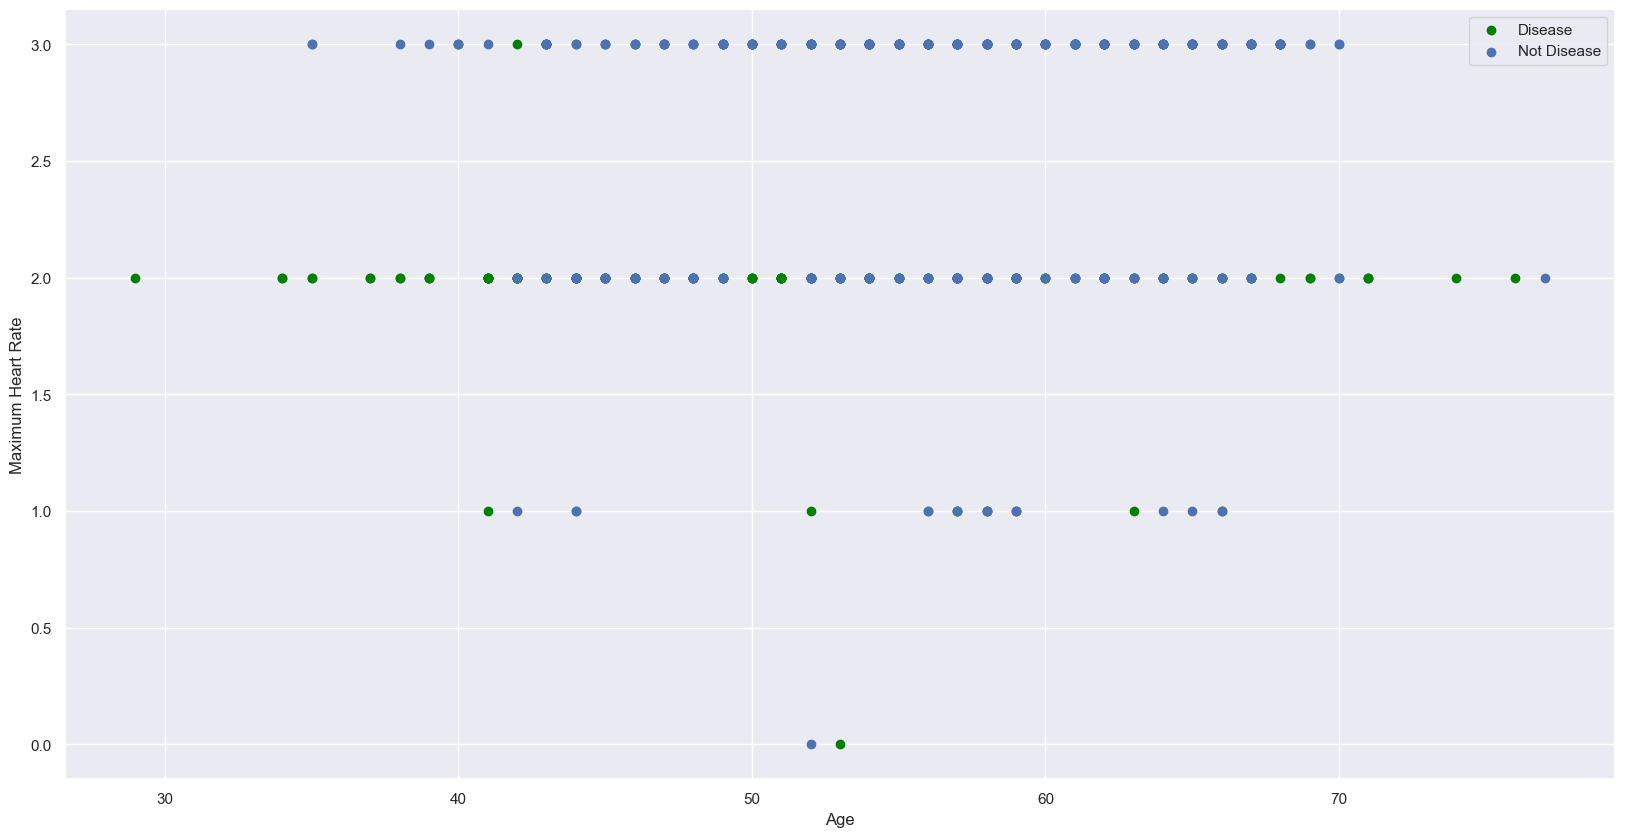

In [475]:
plt.figure(figsize=(20, 10))
plt.scatter(x=data.age[data.target==1], y=data.thalassemia[(data.target==1)], c="green")
plt.scatter(x=data.age[data.target==0], y=data.thalassemia[(data.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

In [476]:
# sns.pairplot(data=data)

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'chest_pain_type'}>,
        <Axes: title={'center': 'resting_blood_pressure'}>],
       [<Axes: title={'center': 'cholesterol'}>,
        <Axes: title={'center': 'fasting_blood_sugar'}>,
        <Axes: title={'center': 'rest_ecg'}>,
        <Axes: title={'center': 'max_heart_rate_achieved'}>],
       [<Axes: title={'center': 'exercise_induced_angina'}>,
        <Axes: title={'center': 'st_depression'}>,
        <Axes: title={'center': 'st_slope'}>,
        <Axes: title={'center': 'num_major_vessels'}>],
       [<Axes: title={'center': 'thalassemia'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

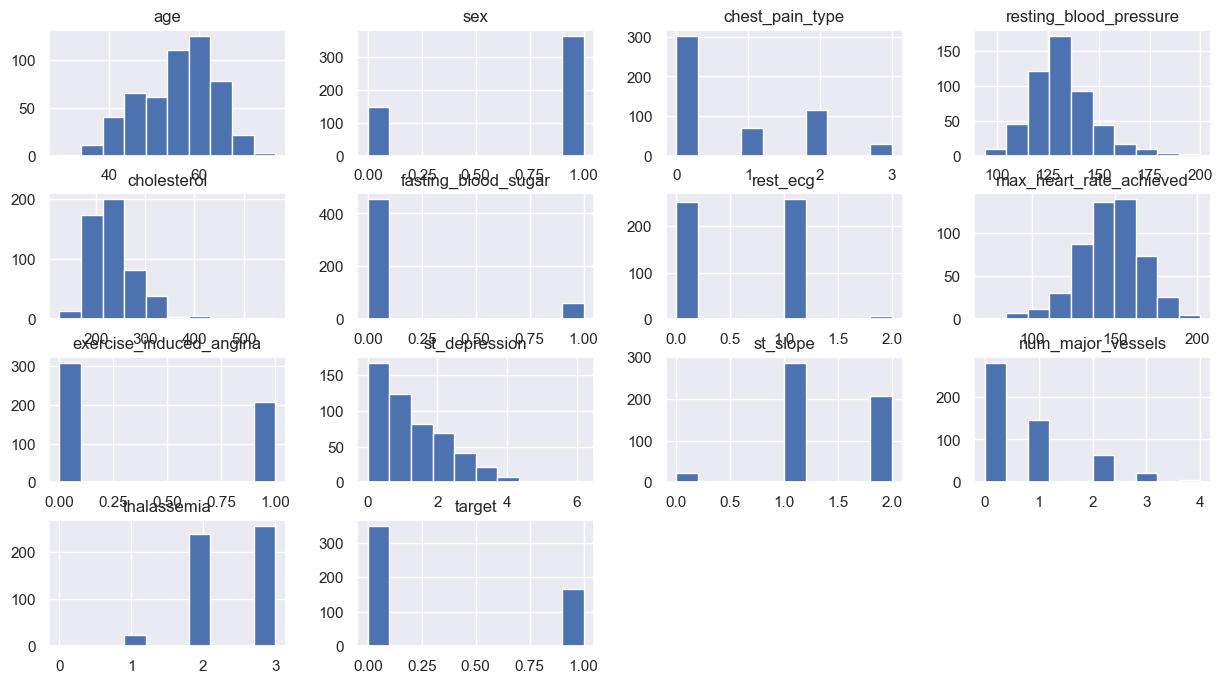

In [477]:
data.hist()

# Correlation plot

Correlation analysis is a method of statistical evaluation used to study the strength of a relationship between two, numerically measured, continuous variables (e.g. height and weight)

In [478]:
# store numeric variables in cnames
cnames=['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression','num_major_vessels']

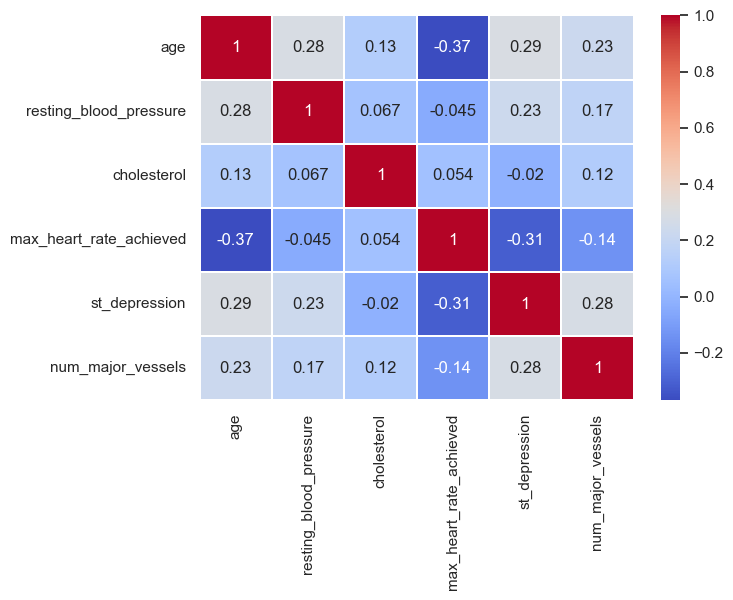

In [479]:
#Set the width and height of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Correlation plot
df_corr = data.loc[:,cnames]
#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, annot = True, cmap='coolwarm',linewidths=.1)
plt.show()

## Correlation analysis

In [480]:
df_corr = data.loc[:,cnames]
df_corr

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels
0,63,145,233,150,2.3,0
1,37,130,250,187,3.5,0
2,41,130,204,172,1.4,0
3,56,120,236,178,0.8,0
4,57,120,354,163,0.6,0
...,...,...,...,...,...,...
510,48,136,190,145,1.1,0
511,65,135,210,135,2.1,0
512,62,128,220,140,1.2,0
513,58,125,200,130,1.0,0


# Splitting the dataset to Train and Test

In [481]:
from sklearn.model_selection import train_test_split

predictors = data.drop("target",axis=1)
target = data["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)
print("Training features have {0} records and Testing features have {1} records.".\
      format(X_train.shape[0], X_test.shape[0]))

Training features have 412 records and Testing features have 103 records.


In [482]:
X_train.shape

(412, 13)

In [483]:
X_test.shape

(103, 13)

In [484]:
Y_train.shape

(412,)

In [485]:
Y_test.shape

(103,)

## importing Accuracy score

In [486]:
from sklearn.metrics import accuracy_score

# Modelling and predicting with Machine Learning
The main goal of the entire project is to predict heart disease occurrence with the highest accuracy. In order to achieve this, we will test several classification algorithms. This section includes all results obtained from the study and introduces the best performer according to accuracy metric. I have chosen several algorithms typical for solving supervised learning problems throughout classification methods.

First of all, let's equip ourselves with a handy tool that benefits from the cohesion of SciKit Learn library and formulate a general function for training our models. The reason for displaying accuracy on both, train and test sets, is to allow us to evaluate whether the model overfits or underfits the data (so-called bias/variance tradeoff).

In [487]:
def train_model(X_train, y_train, X_test, y_test, classifier, **kwargs):

    """
    Fit the chosen model and print out the score.

    """

    # instantiate model
    model = classifier(**kwargs)

    # train model
    model.fit(X_train,y_train)

    # check accuracy and print out the results
    fit_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)

    print(f"Train accuracy: {fit_accuracy:0.2%}")
    print(f"Test accuracy: {test_accuracy:0.2%}")

    return model

# Logistic regression

In [488]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, Y_train)

y_pred_lr = logreg.predict(X_test)
print(y_pred_lr)

[0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0
 0 1 0 1 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1]


In [489]:
score_lr = round(accuracy_score(y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 84.47 %


In [490]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(Y_test,y_pred_lr))
print(classification_report(Y_test,y_pred_lr))
print("Accuracy:",accuracy_score(Y_test, y_pred_lr))

[[66  7]
 [ 9 21]]
              precision    recall  f1-score   support

           0       0.88      0.90      0.89        73
           1       0.75      0.70      0.72        30

    accuracy                           0.84       103
   macro avg       0.81      0.80      0.81       103
weighted avg       0.84      0.84      0.84       103

Accuracy: 0.8446601941747572


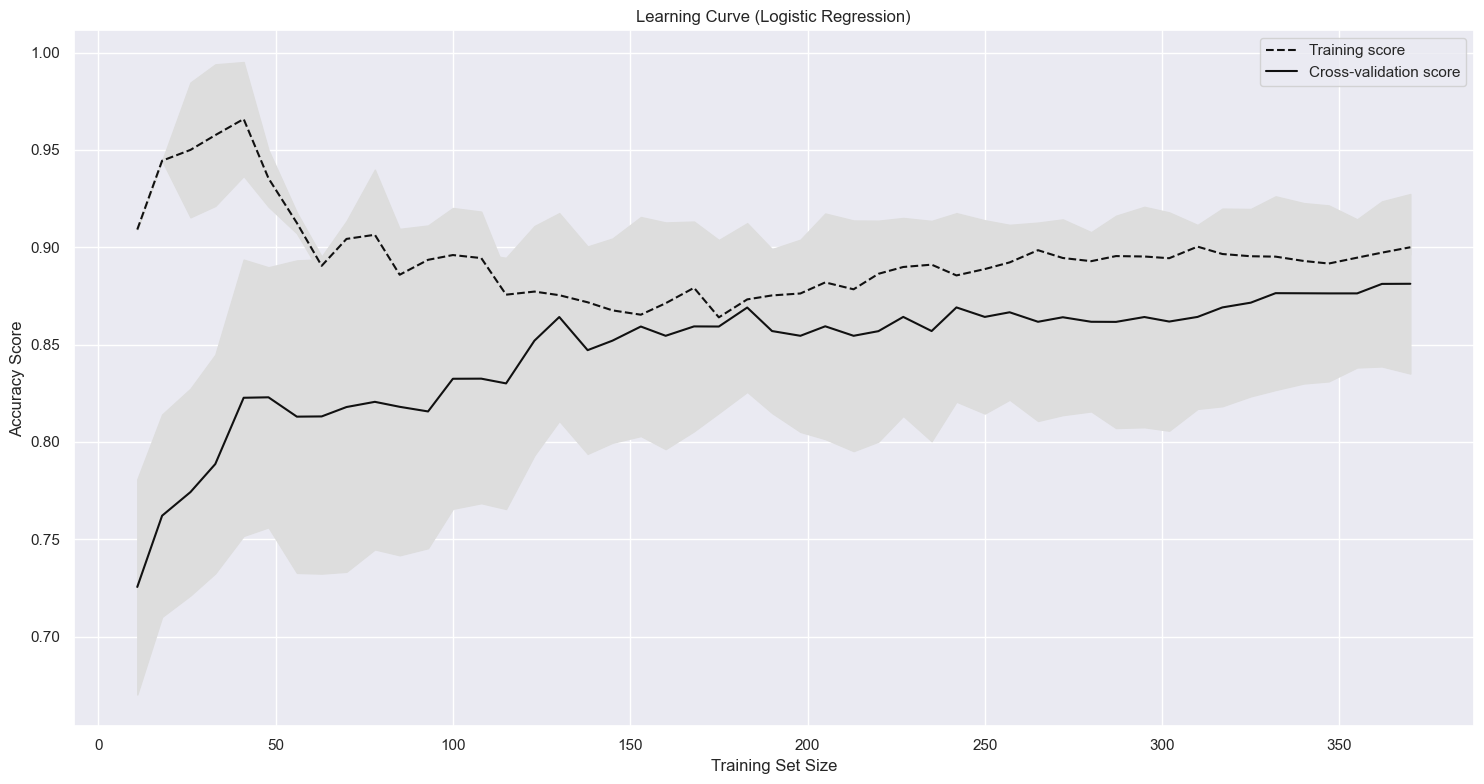

In [491]:
# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(LogisticRegression(),
                                                        X_train,
                                                        Y_train,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1,
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111", label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve (Logistic Regression)")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()


In [492]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model = train_model(X_train, Y_train, X_test, Y_test, LogisticRegression)

Train accuracy: 90.53%
Test accuracy: 84.47%


Best ACCURACY possible using Logistic regression

In [493]:
#Logistic Regression supports only solvers in ['liblinear', 'newton-cg'<-93.44, 'lbfgs'<-91.8, 'sag'<-72.13, 'saga'<-72.13]
clf = LogisticRegression(random_state=0, solver='newton-cg').fit(X_test, Y_test)
#The solver for weight optimization.
#'lbfgs' is an optimizer in the family of quasi-Newton methods.
clf.score(X_test, Y_test)

0.8932038834951457

# Confusion Matrix

In [494]:
from sklearn.metrics import confusion_matrix

In [495]:
matrix= confusion_matrix(Y_test, y_pred_lr)

<Axes: >

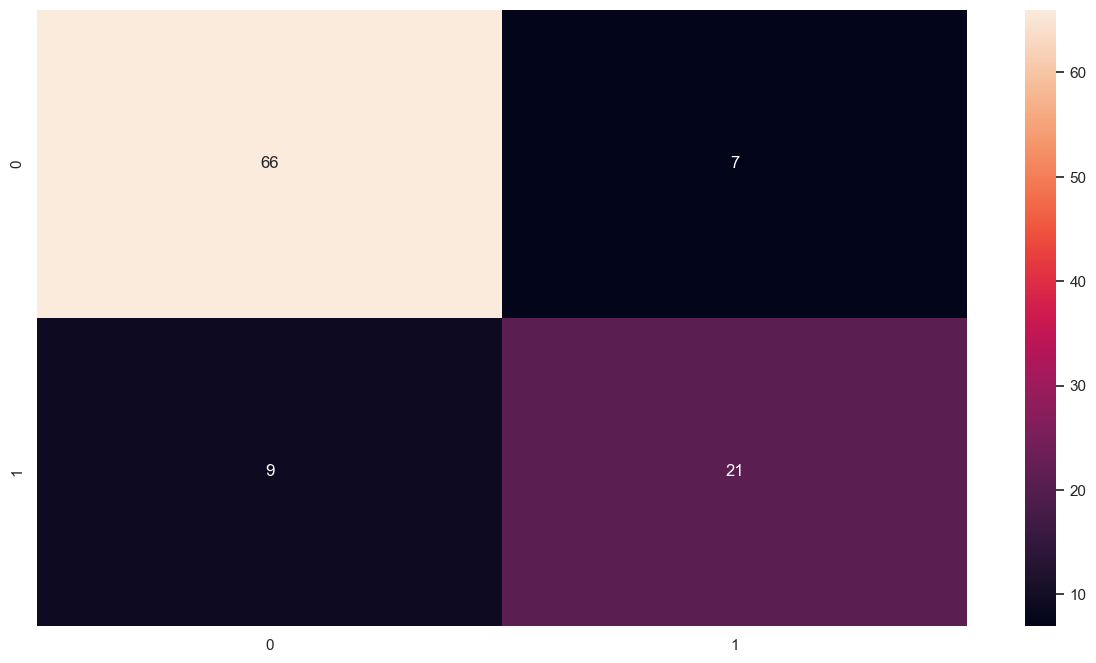

In [496]:
sns.heatmap(matrix,annot = True, fmt = "d")

fmt = d is format = default

# precision Score

In [497]:
from sklearn.metrics import precision_score

In [498]:
precision = precision_score(Y_test, y_pred_lr)

In [499]:
print("Precision: ",precision)

Precision:  0.75


# Recall

In [500]:
from sklearn.metrics import recall_score

In [501]:
recall = recall_score(Y_test, y_pred_lr)

In [502]:
print("Recall is: ",recall)

Recall is:  0.7


# F-Score

balance of precision and recall score

In [503]:
print((2*precision*recall)/(precision+recall))

0.7241379310344827


# Random Forest

In [504]:
from sklearn.ensemble import RandomForestClassifier
randfor = RandomForestClassifier(n_estimators=100, random_state=0)

randfor.fit(X_train, Y_train)

y_pred_rf = randfor.predict(X_test)
print(y_pred_rf)

[0 1 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0
 0 1 1 1 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1]


# Learning curve for Training score & cross validation score

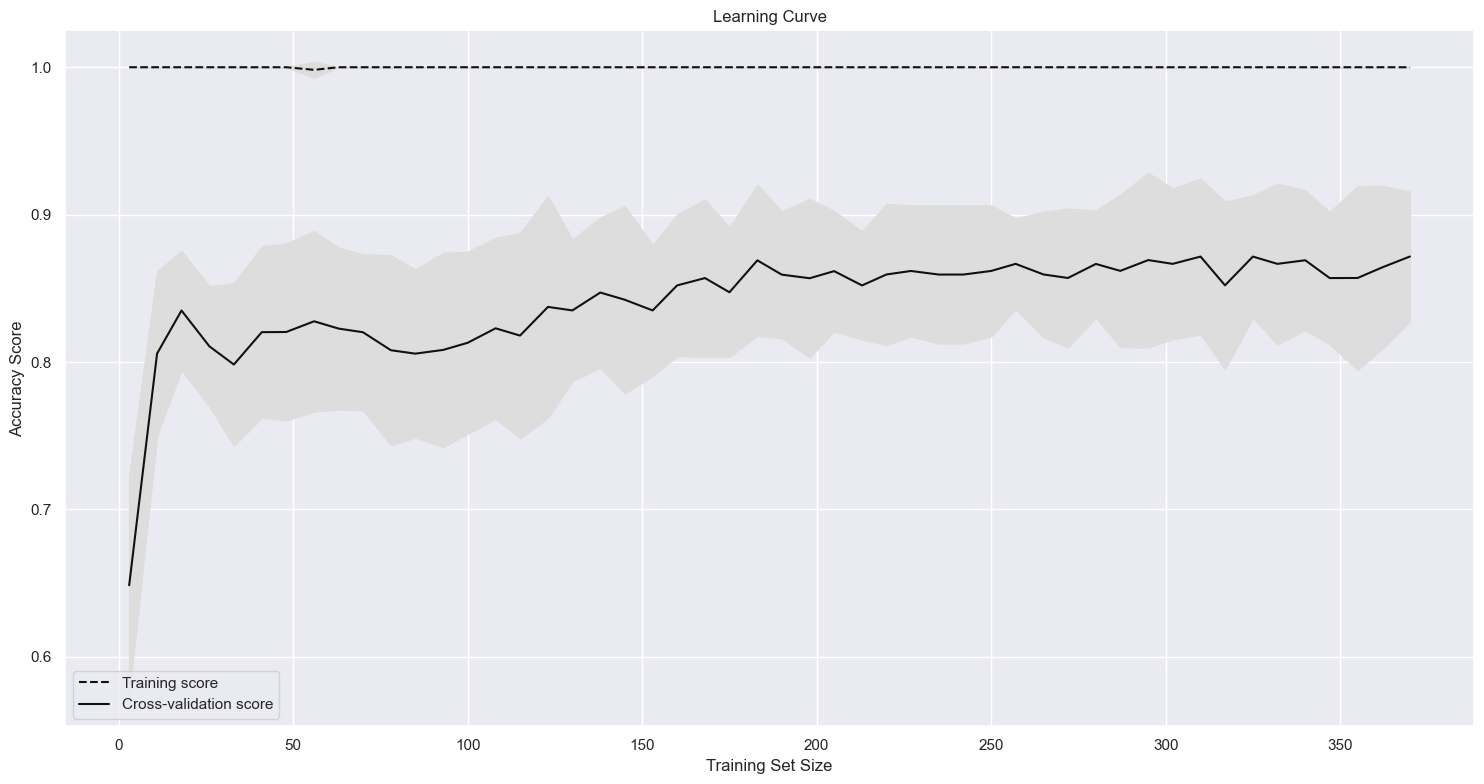

In [505]:
from sklearn.model_selection import learning_curve
# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(),
                                                        X_train,
                                                        Y_train,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1,
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [506]:
score_rf = round(accuracy_score(y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Random Forest is: "+str(score_rf)+" %")

The accuracy score achieved using Random Forest is: 89.32 %


In [507]:
#Random forest with 100 trees
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, Y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.893


Now, let us prune the depth of trees and check the accuracy.

In [508]:
rf1 = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=0)
rf1.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(rf1.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(rf1.score(X_test, Y_test)))

Accuracy on training set: 0.869
Accuracy on test set: 0.854


### Performance metrics
- Accuracy: is the ratio between the number of correct predictions and total number of predications.

$acc = \frac{TP + TN}{TP + TN + FP + FN}$

- Precision: is the ratio between the number of correct positives and the number of true positives plus the number of false positives.

$Precision (p) = \frac{TP}{TP + FP}$

- Recall: is the ratio between the number of correct positives and the number of true positives plus the number of false negatives.

$recall = \frac{TP}{TP + FN}$

- F-score: is known as the harmonic mean of precision and recall.

$acc = \frac{1}{\frac{1}{2}(\frac{1}{p}+\frac{1}{r})} = \frac{2pr}{p+r}$

- Problem characteristics in context of our case study:

TP = True positive (has heart disease). TN = True negative (has no heart disease). FP = False positive (has no heart disease) FN = False negative (has heart disease)

## confusion matrix of Random Forest

In [509]:
from sklearn.metrics import confusion_matrix

In [510]:
matrix= confusion_matrix(Y_test, y_pred_rf)

<Axes: >

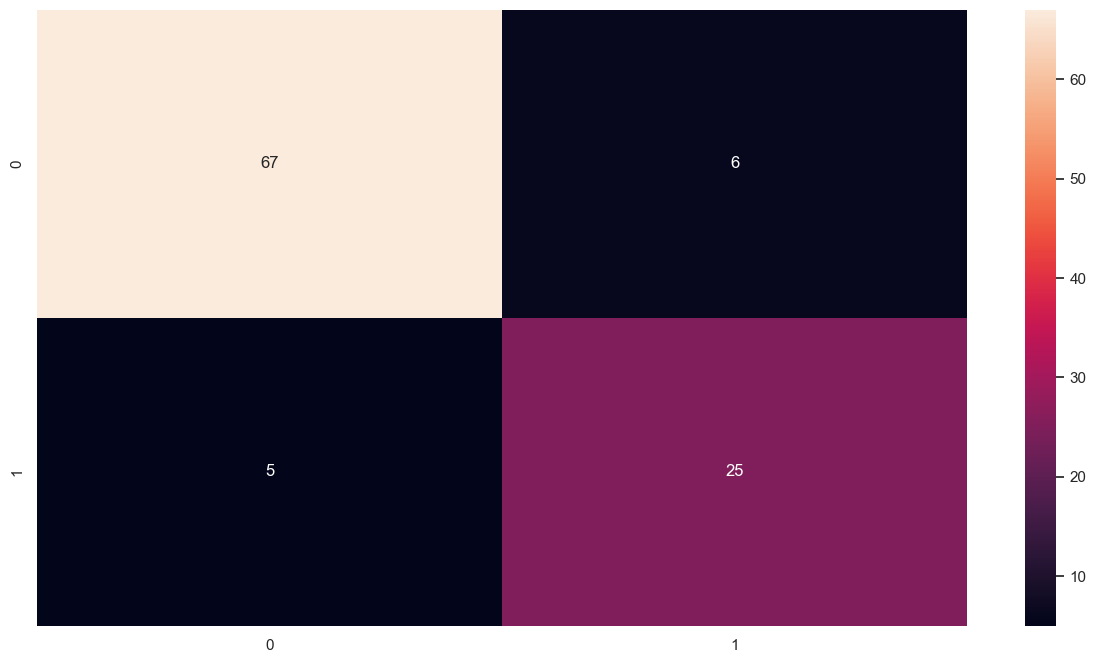

In [511]:
sns.heatmap(matrix,annot = True, fmt = "d")

# precision score

In [512]:
from sklearn.metrics import precision_score

In [513]:
precision = precision_score(Y_test, y_pred_rf)

In [514]:
print("Precision: ",precision)

Precision:  0.8064516129032258


# recall

In [515]:
from sklearn.metrics import recall_score

In [516]:
recall = recall_score(Y_test, y_pred_rf)

In [517]:
print("Recall is: ",recall)

Recall is:  0.8333333333333334


# F score

In [518]:
print((2*precision*recall)/(precision+recall))

0.819672131147541


# Naive Bayes

In [519]:
from sklearn.naive_bayes import GaussianNB
nb = train_model(X_train, Y_train, X_test, Y_test, GaussianNB)

nb.fit(X_train, Y_train)

y_pred_nb = nb.predict(X_test)
print(y_pred_nb)

Train accuracy: 87.14%
Test accuracy: 85.44%
[0 1 1 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0
 0 1 0 1 0 1 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0
 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1]


In [520]:
score_nb = round(accuracy_score(y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 85.44 %


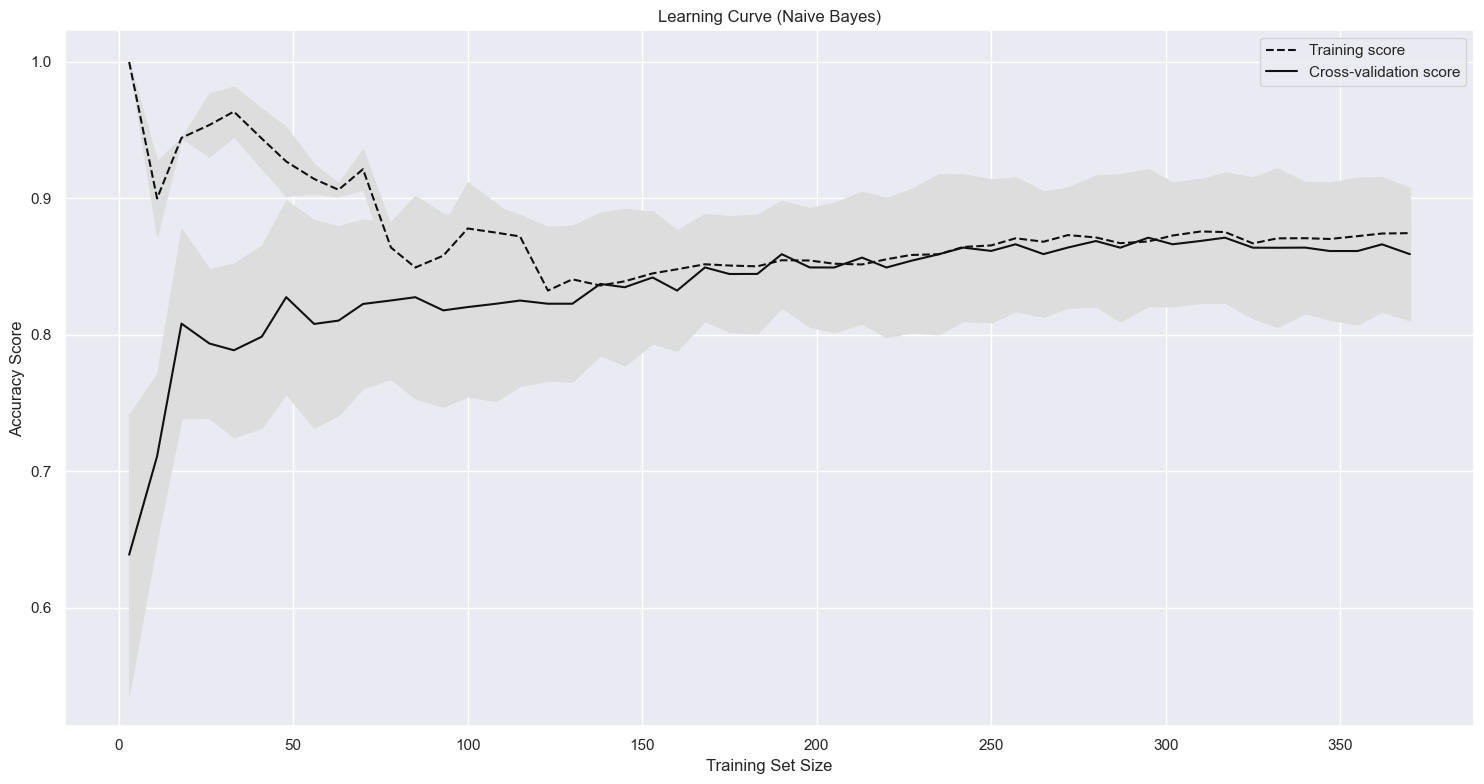

In [521]:
# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(GaussianNB(),
                                                        X_train,
                                                        Y_train,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1,
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111", label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve (Naive Bayes)")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()


In [522]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
model = train_model(X_train, Y_train, X_test, Y_test, GaussianNB)

Train accuracy: 87.14%
Test accuracy: 85.44%


## confusion matrix of Naive Bayes

In [523]:
from sklearn.metrics import confusion_matrix

In [524]:
matrix= confusion_matrix(Y_test, y_pred_nb)

<Axes: >

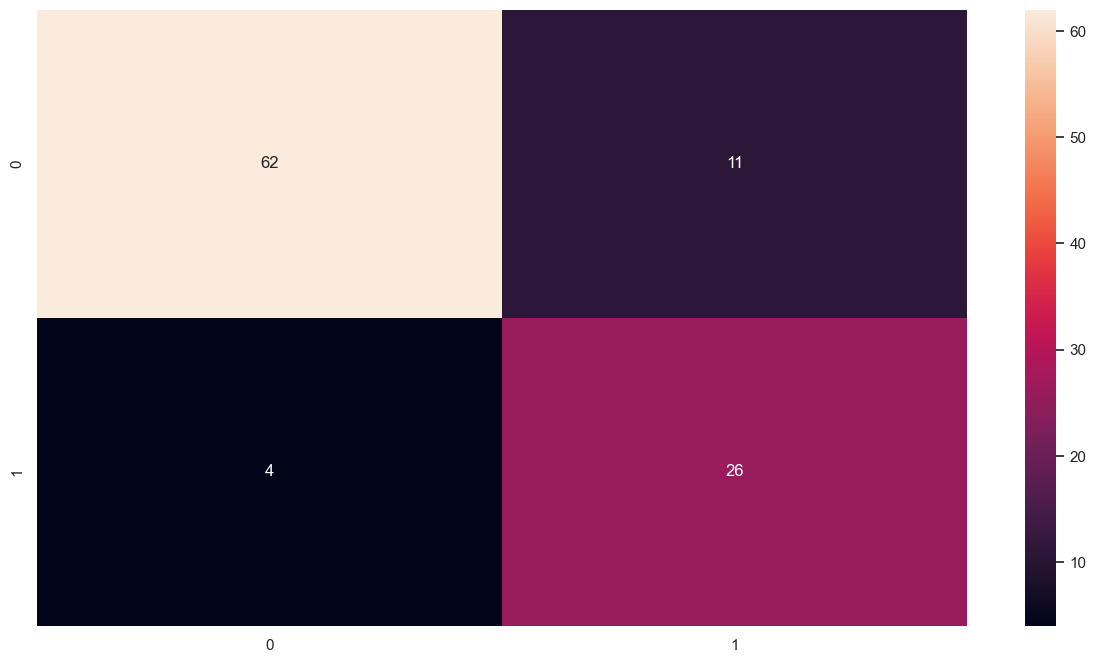

In [525]:
sns.heatmap(matrix,annot = True, fmt = "d")

# precision score

In [526]:
from sklearn.metrics import precision_score

In [527]:
precision = precision_score(Y_test, y_pred_nb)

In [528]:
print("Precision: ",precision)

Precision:  0.7027027027027027


# recall

In [529]:
from sklearn.metrics import recall_score

In [530]:
recall = recall_score(Y_test, y_pred_nb)

In [531]:
print("Recall is: ",recall)

Recall is:  0.8666666666666667


# f score

In [532]:
print((2*precision*recall)/(precision+recall))

0.7761194029850748


# KNN(K Nearest Neighbors)

In [533]:
from sklearn.neighbors import KNeighborsClassifier
knn = train_model(X_train, Y_train, X_test, Y_test, KNeighborsClassifier, n_neighbors=8)

knn.fit(X_train, Y_train)

y_pred_knn = knn.predict(X_test)
print(y_pred_knn)

Train accuracy: 78.64%
Test accuracy: 77.67%
[0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0
 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]


In [534]:
score_knn = round(accuracy_score(y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 77.67 %


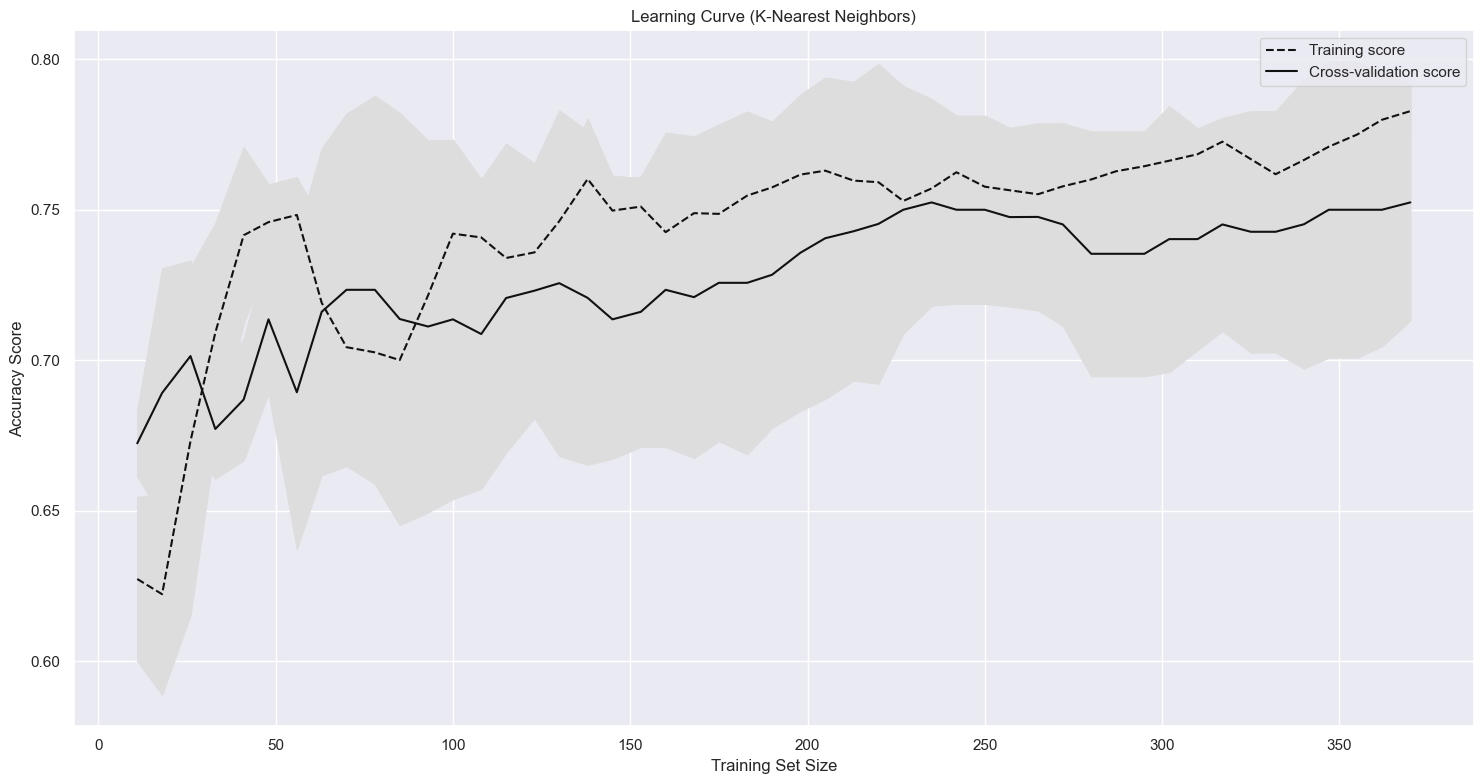

In [535]:
# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(KNeighborsClassifier(n_neighbors=8),
                                                        X_train,
                                                        Y_train,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1,
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111", label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve (K-Nearest Neighbors)")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()


In [536]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
model = train_model(X_train, Y_train, X_test, Y_test, KNeighborsClassifier)

Train accuracy: 82.04%
Test accuracy: 72.82%


Let's see if KNN can perform even better by trying different 'n_neighbours' inputs.

In [537]:
# Seek optimal 'n_neighbours' parameter
for i in range(1,10):
    print("n_neigbors = "+str(i))
    train_model(X_train, Y_train, X_test, Y_test, KNeighborsClassifier, n_neighbors=i)

n_neigbors = 1
Train accuracy: 100.00%
Test accuracy: 67.96%
n_neigbors = 2
Train accuracy: 83.98%
Test accuracy: 74.76%
n_neigbors = 3
Train accuracy: 86.17%
Test accuracy: 71.84%
n_neigbors = 4
Train accuracy: 81.07%
Test accuracy: 71.84%
n_neigbors = 5
Train accuracy: 82.04%
Test accuracy: 72.82%
n_neigbors = 6
Train accuracy: 79.85%
Test accuracy: 75.73%
n_neigbors = 7
Train accuracy: 79.37%
Test accuracy: 73.79%
n_neigbors = 8
Train accuracy: 78.64%
Test accuracy: 77.67%
n_neigbors = 9
Train accuracy: 79.61%
Test accuracy: 76.70%


It turns out that value of n_neighbours (8) is optimal.

## Confusion matrix

In [538]:
from sklearn.metrics import confusion_matrix

In [539]:
matrix= confusion_matrix(Y_test, y_pred_knn)

<Axes: >

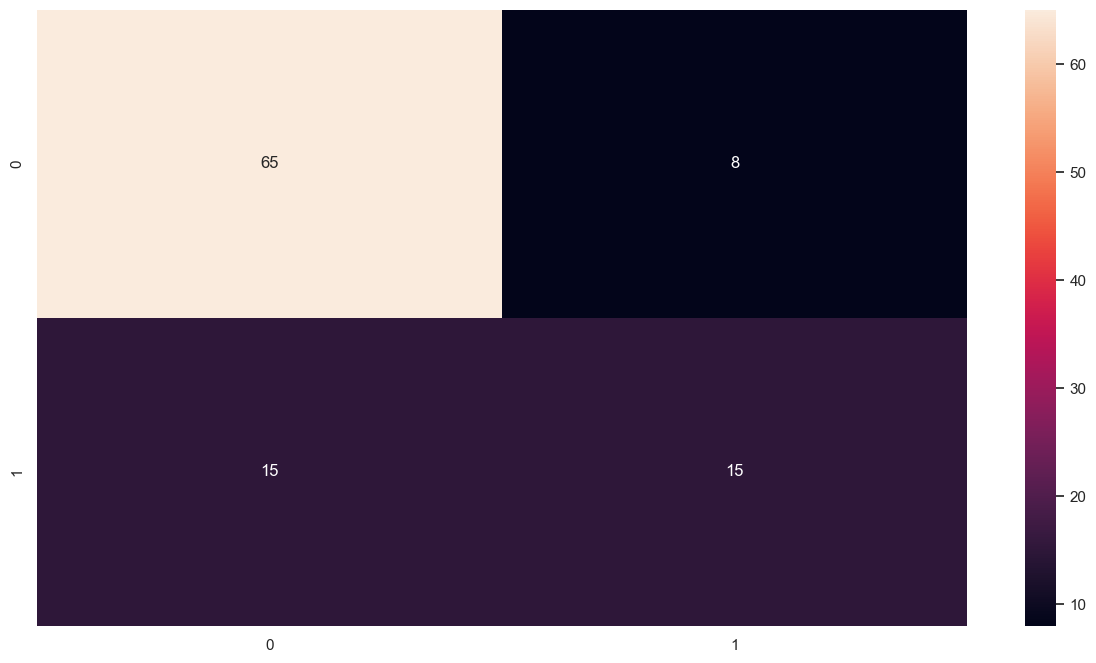

In [540]:
sns.heatmap(matrix,annot = True, fmt = "d")

# precision score

In [541]:
from sklearn.metrics import precision_score

In [542]:
precision = precision_score(Y_test, y_pred_knn)

In [543]:
print("Precision: ",precision)

Precision:  0.6521739130434783


# recall

In [544]:
from sklearn.metrics import recall_score

In [545]:
recall = recall_score(Y_test, y_pred_knn)

In [546]:
print("Recall is: ",recall)

Recall is:  0.5


# f score

In [547]:
print((2*precision*recall)/(precision+recall))

0.5660377358490566


# Decision Tree

In [548]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3, random_state=0)

dt.fit(X_train, Y_train)

y_pred_dt = dt.predict(X_test)
print(y_pred_dt)

[0 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0
 0 1 1 1 0 1 1 1 1 0 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 1 0 1 1 0 0 1 0
 1 1 1 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 1 1 1]


In [549]:
score_dt = round(accuracy_score(y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 75.73 %


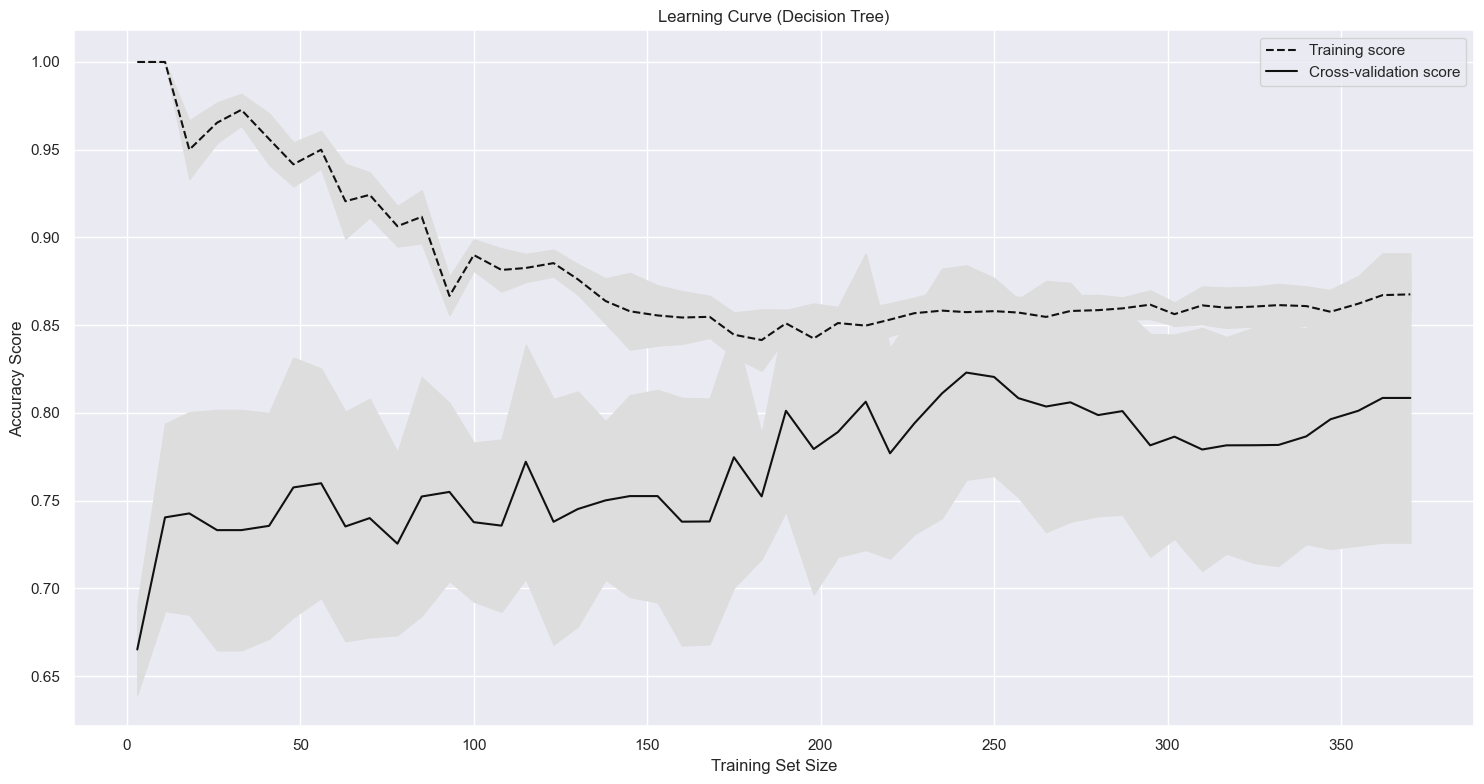

In [550]:
# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(DecisionTreeClassifier(max_depth=3, random_state=0),
                                                        X_train,
                                                        Y_train,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1,
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111", label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve (Decision Tree)")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()


In [551]:
from sklearn.tree import DecisionTreeClassifier
tree1 = DecisionTreeClassifier(random_state=0)
tree1.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(tree1.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(tree1.score(X_test, Y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.825


The accuracy on the training set is 100%, while the test set accuracy is much worse. This is an indicative that the tree is overfitting and not generalizing well to new data. Therefore, we need to apply pre-pruning to the tree.

We set max_depth=3, limiting the depth of the tree decreases overfitting. This leads to a lower accuracy on the training set, but an improvement on the test set.

In [552]:
tree1 = DecisionTreeClassifier(max_depth=3, random_state=0)
tree1.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(tree1.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(tree1.score(X_test, Y_test)))

Accuracy on training set: 0.862
Accuracy on test set: 0.757


## Confusion Matrix

In [553]:
from sklearn.metrics import confusion_matrix

In [554]:
matrix= confusion_matrix(Y_test, y_pred_dt)

<Axes: >

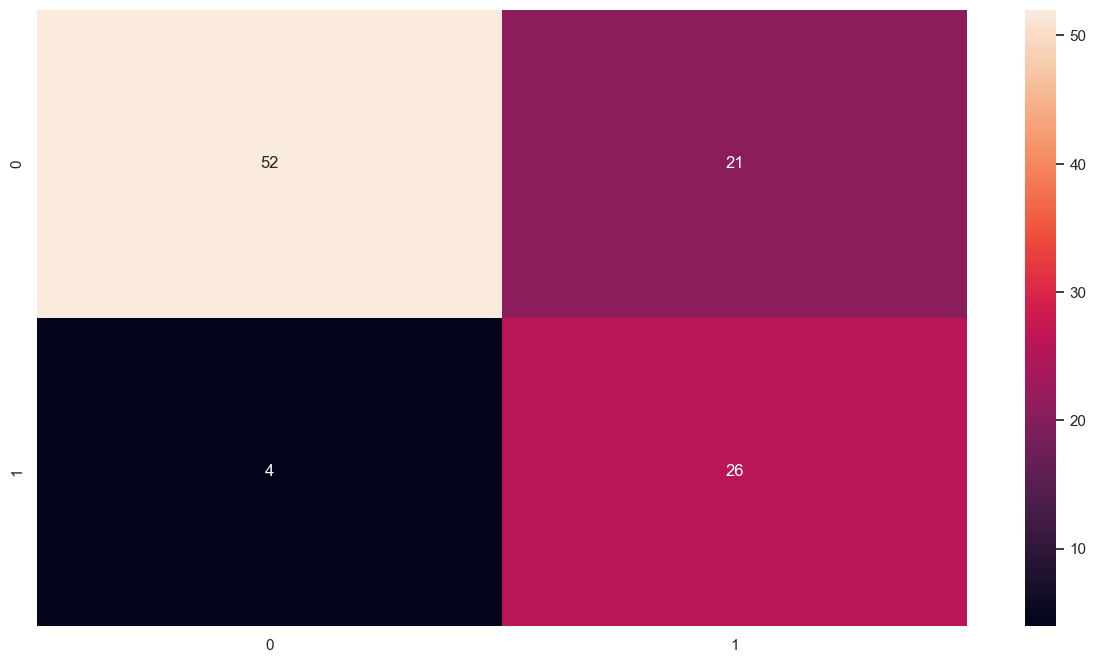

In [555]:
sns.heatmap(matrix,annot = True, fmt = "d")

# precision score

In [556]:
from sklearn.metrics import precision_score

In [557]:
precision = precision_score(Y_test, y_pred_dt)

In [558]:
print("Precision: ",precision)

Precision:  0.5531914893617021


# recall

In [559]:
from sklearn.metrics import recall_score

In [560]:
recall = recall_score(Y_test, y_pred_dt)

In [561]:
print("Recall is: ",recall)

Recall is:  0.8666666666666667


# f score

In [562]:
print((2*precision*recall)/(precision+recall))

0.6753246753246753


# Final Score

In [563]:
# initialize an empty list
accuracy = []

# list of algorithms names
classifiers = ['KNN', 'Decision Trees', 'Logistic Regression', 'Naive Bayes', 'Random Forests']

# list of algorithms with parameters
models = [KNeighborsClassifier(n_neighbors=8), DecisionTreeClassifier(max_depth=3, random_state=0), LogisticRegression(),
        GaussianNB(), RandomForestClassifier(n_estimators=100, random_state=0)]

# loop through algorithms and append the score into the list
for i in models:
    model = i
    model.fit(X_train, Y_train)
    score = model.score(X_test, Y_test)
    accuracy.append(score)

In [564]:
# create a dataframe from accuracy results
summary = pd.DataFrame({'accuracy':accuracy}, index=classifiers)
summary

,accuracy
KNN,0.776699
Decision Trees,0.757282
Logistic Regression,0.844660
Naive Bayes,0.854369
Random Forests,0.893204


<Axes: xlabel='Algorithms', ylabel='Accuracy score'>

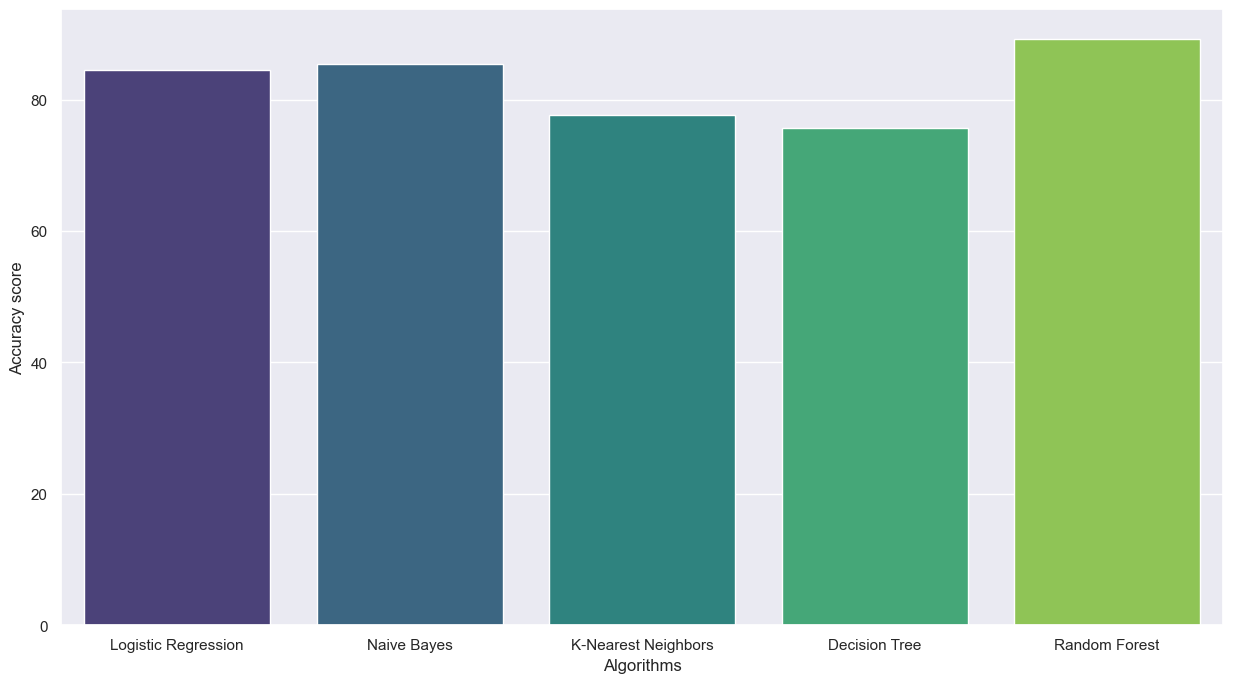

In [565]:
scores = [score_lr, score_nb, score_knn, score_dt, score_rf]
algorithms = ["Logistic Regression", "Naive Bayes", "K-Nearest Neighbors", "Decision Tree", "Random Forest"]
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(x=algorithms, y=scores, hue=algorithms ,palette="viridis")



---

